In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn gensim tensorflow nltk beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 48.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nlp_project/Train.csv')

print(f"Training Data Shape: {df.shape}")
print(df.head())

Training Data Shape: (93333, 2)
                                             QA Text                  Class
0  <html> Question Title:\n <br> What are the nam...  Science & Mathematics
1  <html> Question Title:\n <br> can you tell me ...  Education & Reference
2  <html> Question Title:\n <br> Suggestions or A...  Politics & Government
3  <html> Question Title:\n <br> where can i find...  Entertainment & Music
4  <html> Question Title:\n <br> will the first t...                 Sports


In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/nlp_project/Train.csv')
# test_df = pd.read_csv(test_path)


print(f"Training Set Shape: {train_df.shape}")
# print(f"Testing Set Shape: {test_df.shape}")
print()


Training Set Shape: (93333, 2)



In [ ]:


print(train_df.head())


print("Training Data Info:")
print(train_df.info())

print()

print(f"columns: {train_df.columns.tolist()}")

print()


                                             QA Text                  Class
0  <html> Question Title:\n <br> What are the nam...  Science & Mathematics
1  <html> Question Title:\n <br> can you tell me ...  Education & Reference
2  <html> Question Title:\n <br> Suggestions or A...  Politics & Government
3  <html> Question Title:\n <br> where can i find...  Entertainment & Music
4  <html> Question Title:\n <br> will the first t...                 Sports
Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93333 entries, 0 to 93332
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   QA Text  93333 non-null  object
 1   Class    93333 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None

columns: ['QA Text', 'Class']



####Missing Values

In [ ]:

print(train_df.isnull().sum())
print(f"Total missing values: {train_df.isnull().sum().sum()}")




QA Text    0
Class      0
dtype: int64
Total missing values: 0


###Class Distribution analysis

Training Set - Class Distribution:
Class
Family & Relationships    9432
Politics & Government     9432
Computers & Internet      9429
Sports                    9404
Education & Reference     9385
Business & Finance        9350
Society & Culture         9271
Health                    9263
Science & Mathematics     9217
Entertainment & Music     9150
Name: count, dtype: int64
Number of unique classes: 10
Class names: ['Science & Mathematics', 'Education & Reference', 'Politics & Government', 'Entertainment & Music', 'Sports', 'Society & Culture', 'Computers & Internet', 'Family & Relationships', 'Business & Finance', 'Health']


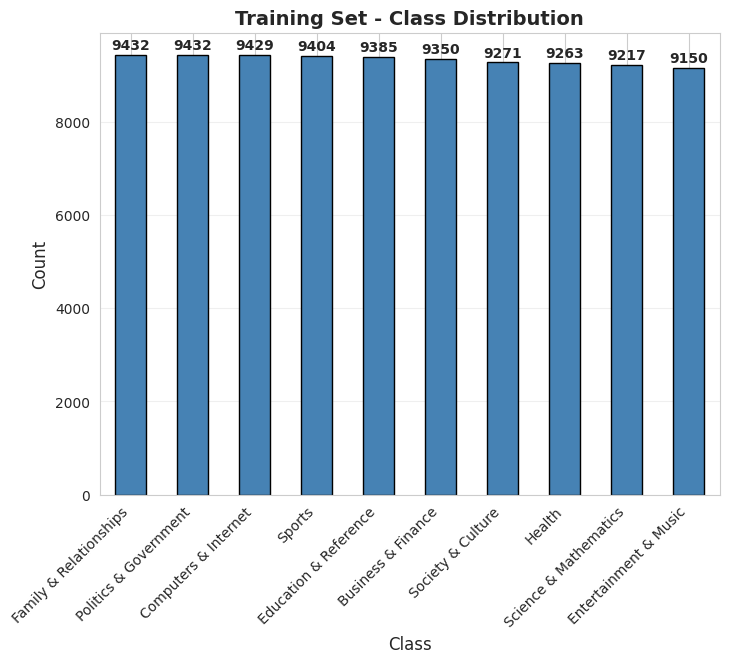

Training Set - Class Percentages:
Class
Family & Relationships    10.105750
Politics & Government     10.105750
Computers & Internet      10.102536
Sports                    10.075750
Education & Reference     10.055393
Business & Finance        10.017893
Society & Culture          9.933250
Health                     9.924678
Science & Mathematics      9.875392
Entertainment & Music      9.803606
Name: count, dtype: float64


In [ ]:


# Training se t class distribution
print("Training Set - Class Distribution:")
train_class_counts = train_df['Class'].value_counts()
print(train_class_counts)
print(f"Number of unique classes: {train_df['Class'].nunique()}")
print(f"Class names: {train_df['Class'].unique().tolist()}")





fig, axes = plt.subplots(figsize=(8, 6))

# Training set
train_class_counts.plot(kind='bar', ax=axes, color='steelblue', edgecolor='black')
axes.set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
axes.set_xlabel('Class', fontsize=12)
axes.set_ylabel('Count', fontsize=12)
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha="right")
# Add value labels on bars
for i, v in enumerate(train_class_counts):
    axes.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

# Check for class imbalance

train_class_percentages = (train_class_counts / len(train_df)) * 100
print("Training Set - Class Percentages:")
print(train_class_percentages)

###Text Length Analysis

Training Set - Text Length Statistics:
count    93333.000000
mean       635.105933
std        580.559597
min        128.000000
25%        289.000000
50%        452.000000
75%        753.000000
max       5973.000000
Name: text_length, dtype: float64

Training Set - Word Count Statistics:
count    93333.000000
mean       106.572156
std         99.139635
min         16.000000
25%         46.000000
50%         75.000000
75%        129.000000
max        997.000000
Name: word_count, dtype: float64


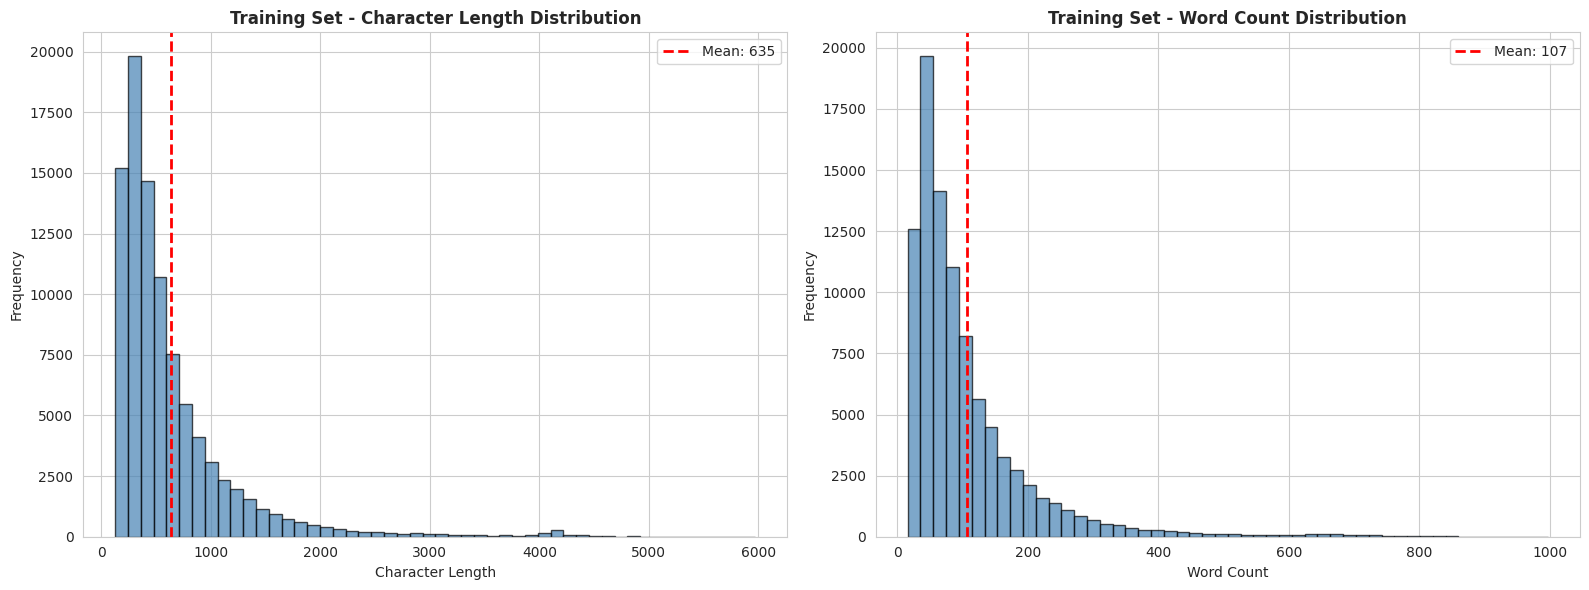

In [ ]:


# Calculate text lengths
train_df['text_length'] = train_df['QA Text'].astype(str).apply(len)

# Calculate word counts
train_df['word_count'] = train_df['QA Text'].astype(str).apply(lambda x: len(x.split()))

print("Training Set - Text Length Statistics:")
print(train_df['text_length'].describe())

print()

print("Training Set - Word Count Statistics:")
print(train_df['word_count'].describe())


# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length - Training
axes[0].hist(train_df['text_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Training Set - Character Length Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Character Length', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["text_length"].mean():.0f}')
axes[0].legend()



# Word count - Training
axes[1].hist(train_df['word_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Training Set - Word Count Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["word_count"].mean():.0f}')
axes[1].legend()



plt.tight_layout()
plt.show()

#### HTML Tag analysis

In [ ]:


print("\nSample text (first 500 characters):")
print(train_df['QA Text'].iloc[0][:500])


html_tags = ['<html>', '<br>', 'Question Title:', 'Question Content:', 'Best Answer:']
print("\nHTML Tag Presence Analysis:")
for tag in html_tags:
    count = train_df['QA Text'].astype(str).str.contains(tag, case=False, regex=False).sum()
    percentage = (count / len(train_df)) * 100
    print(f"{tag}: {count} ({percentage:.2f}%)")


Sample text (first 500 characters):
<html> Question Title:
 <br> What are the names of the 206 bones in the human body?
 <br> <br> <br><br><br> Question Content:
 <br> 
 <br> <br>Best Answer:
 <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n    2 parietal\n    2 temporal\n    1 frontal\n    1 occipital\n    1 sphenoid\n    1 ethmoid\n\nFacial Bones\n    1 mandible\n    1 vomer\n    2 maxillae\n    2 zygomatic\n    2 nasals\n    2 lacrimal\n    2 palatines\n    2 inferior conchae\n    1 Hyoid Bone \n\nE

HTML Tag Presence Analysis:
<html>: 93333 (100.00%)
<br>: 93333 (100.00%)
Question Title:: 93333 (100.00%)
Question Content:: 93333 (100.00%)
Best Answer:: 93333 (100.00%)


### Data Quality checks

In [ ]:



train_duplicates = train_df.duplicated().sum()
print(f"\nDuplicate rows in training set: {train_duplicates}")
short_texts_train = (train_df['word_count'] < 10).sum()
print(f"\nTexts with less than 10 words in training: {short_texts_train}")

long_texts_train = (train_df['word_count'] > 1000).sum()
print(f"\nTexts with more than 1000 words in training: {long_texts_train}")




Duplicate rows in training set: 0

Texts with less than 10 words in training: 0

Texts with more than 1000 words in training: 0


### word frequency and word cloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


ANALYSIS 1: ORIGINAL TEXT - ALL WORDS (With Stopwords)

Total unique words: 127,732
Total word occurrences: 9,794,630

Top 30 most frequent words:
--------------------------------------------------------------------------------
 1. br                   :  933,380 times
 2. the                  :  358,963 times
 3. to                   :  237,840 times
 4. and                  :  205,728 times
 5. a                    :  203,187 times
 6. question             :  194,565 times
 7. i                    :  179,722 times
 8. of                   :  161,833 times
 9. you                  :  154,883 times
10. is                   :  150,344 times
11. in                   :  123,566 times
12. it                   :  120,337 times
13. best                 :  103,315 times
14. that                 :  101,649 times
15. answer               :   99,939 times
16. title                :   94,086 times
17. content              :   93,831 times
18. html                 :   93,637 times
19. for         

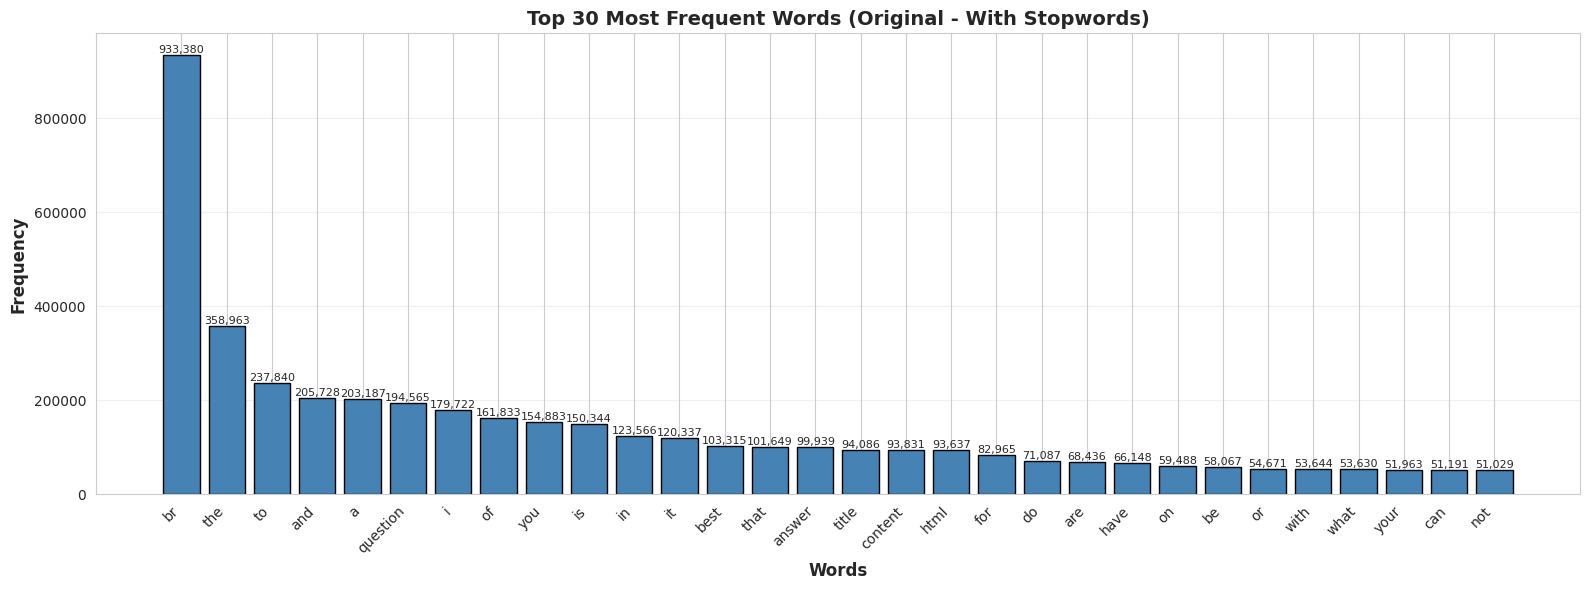


ANALYSIS 2: ORIGINAL TEXT - CONTENT WORDS (Stopwords Removed)

Total unique words: 127,581
Total word occurrences: 5,622,603

Top 50 most frequent content words:
--------------------------------------------------------------------------------
 1. br                   :  933,380 times
 2. question             :  194,565 times
 3. best                 :  103,315 times
 4. answer               :   99,939 times
 5. title                :   94,086 times
 6. content              :   93,831 times
 7. html                 :   93,637 times
 8. like                 :   29,305 times
 9. get                  :   28,869 times
10. would                :   28,551 times
11. one                  :   25,629 times
12. know                 :   25,095 times
13. people               :   19,985 times
14. think                :   19,874 times
15. want                 :   17,466 times
16. good                 :   17,414 times
17. go                   :   16,844 times
18. time                 :   16,175 times


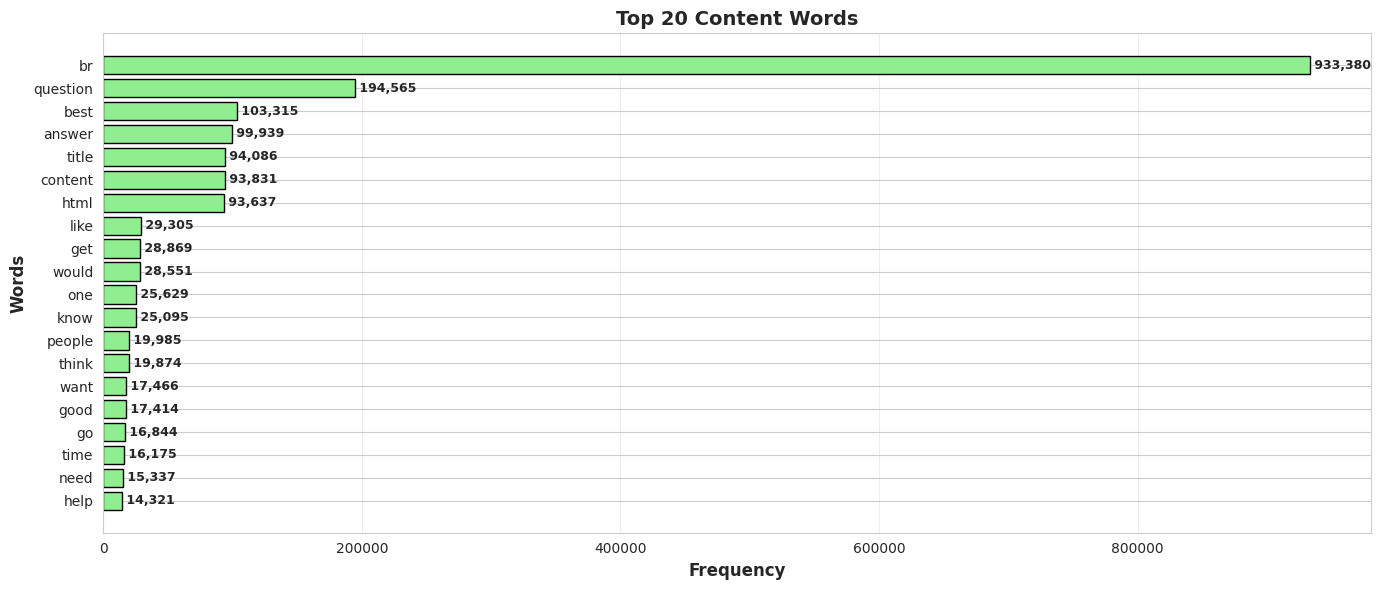


ANALYSIS 4: WORD CLOUDS
Generating WordCloud 1: Original with stopwords...
Generating WordCloud 2: Original without stopwords...

WordCloud generation complete!


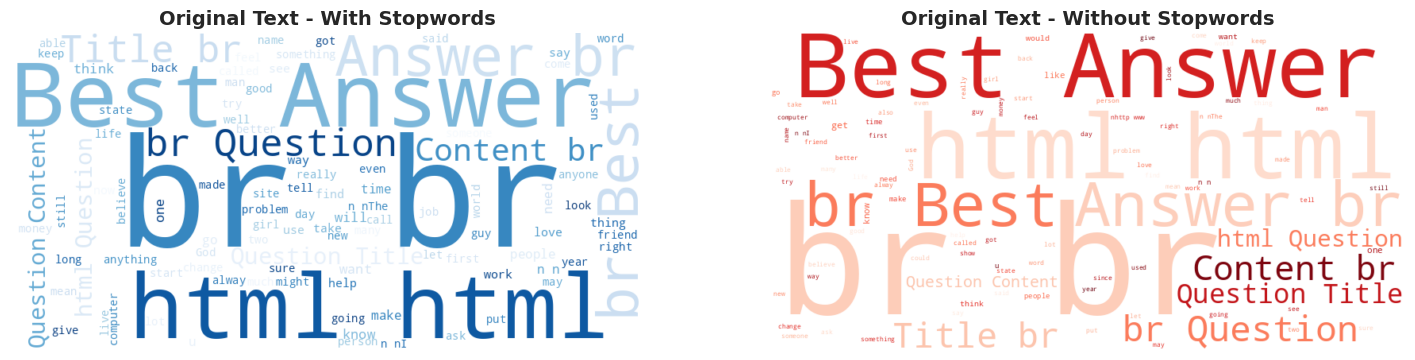

In [ ]:


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')



def get_word_frequencies(texts, remove_stopwords=False):
    """Extract and count word frequencies"""
    all_words = []
    stop_words = set(stopwords.words('english')) if remove_stopwords else set()

    for text in texts:
        if pd.isna(text):
            continue

        text = str(text).lower()

        try:
            tokens = word_tokenize(text)
        except:
            tokens = text.split()

        # Keep only alphabetic tokens
        tokens = [word for word in tokens if word.isalpha()]

        if remove_stopwords:
            tokens = [word for word in tokens if word not in stop_words]

        all_words.extend(tokens)

    return Counter(all_words)



# original text with stopwords


print("ANALYSIS 1: ORIGINAL TEXT - ALL WORDS (With Stopwords)")


word_freq_original = get_word_frequencies(train_df['QA Text'], remove_stopwords=False)

print(f"\nTotal unique words: {len(word_freq_original):,}")
print(f"Total word occurrences: {sum(word_freq_original.values()):,}")
print(f"\nTop 30 most frequent words:")


top_30_original = word_freq_original.most_common(30)
for i, (word, freq) in enumerate(top_30_original, 1):
    print(f"{i:2d}. {word:20s} : {freq:8,d} times")

# Visualize
plt.figure(figsize=(16, 6))
words, counts = zip(*top_30_original)
plt.bar(range(len(words)), counts, color='steelblue', edgecolor='black')
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Words (Original - With Stopwords)', fontsize=14, fontweight='bold')
plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# original text without stopwords


print("ANALYSIS 2: ORIGINAL TEXT - CONTENT WORDS (Stopwords Removed)")


word_freq_no_stop = get_word_frequencies(train_df['QA Text'], remove_stopwords=True)

print(f"\nTotal unique words: {len(word_freq_no_stop):,}")
print(f"Total word occurrences: {sum(word_freq_no_stop.values()):,}")
print(f"\nTop 50 most frequent content words:")
print("-" * 80)

top_50_no_stop = word_freq_no_stop.most_common(50)
for i, (word, freq) in enumerate(top_50_no_stop, 1):
    print(f"{i:2d}. {word:20s} : {freq:8,d} times")

# Visualize - Two views
fig, axes = plt.subplots( figsize=(14, 6))

# Vertical bar chart - Top 30


# Horizontal bar chart - Top 20
words_20, counts_20 = zip(*top_50_no_stop[:20])
axes.barh(range(len(words_20)), counts_20, color='lightgreen', edgecolor='black')
axes.set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes.set_ylabel('Words', fontsize=12, fontweight='bold')
axes.set_title('Top 20 Content Words', fontsize=14, fontweight='bold')
axes.set_yticks(range(len(words_20)))
axes.set_yticklabels(words_20)
axes.invert_yaxis()
axes.grid(axis='x', alpha=0.3)

for i, count in enumerate(counts_20):
    axes.text(count, i, f' {count:,}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


# word clouds


print("ANALYSIS 3: WORD CLOUDS")


# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# WordCloud 1: Original text with stopwords
print("Generating WordCloud 1: Original with stopwords...")
text_original_all = ' '.join(train_df['QA Text'].dropna().astype(str))
wordcloud1 = WordCloud(width=800, height=400, background_color='white',
                       colormap='Blues', max_words=100).generate(text_original_all)
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('Original Text - With Stopwords', fontsize=14, fontweight='bold')
axes[0].axis('off')

# WordCloud 2: Original text without stopwords
print("Generating WordCloud 2: Original without stopwords...")
stop_words = set(stopwords.words('english'))
wordcloud2 = WordCloud(width=800, height=400, background_color='white',
                       colormap='Reds', max_words=100,
                       stopwords=stop_words).generate(text_original_all)
axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('Original Text - Without Stopwords', fontsize=14, fontweight='bold')
axes[1].axis('off')


print("\nWordCloud generation complete!")



# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
print("Downloading NLTK resources...")
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("NLTK resources ready\n")


✓ NLTK resources ready



## Load Data

In [ ]:


train_df = pd.read_csv('/content/drive/MyDrive/nlp_project/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/nlp_project/Test.csv')

print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")
print(f"Columns: {train_df.columns.tolist()}")


Training samples: 93333
Testing samples: 59999
Columns: ['QA Text', 'Class']


## Preprocessing Function

In [ ]:


def clean_text(text):

    if pd.isna(text) or text == '':
        return ""

    text = str(text)

    #  Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text(separator=' ')

    # Remove HTML artifacts that BeautifulSoup might miss
    text = re.sub(r'&[a-z]+;', ' ', text)
    text = re.sub(r'&#[0-9]+;', ' ', text)

    #  Remove structural markers
    markers = [
        'question title', 'question content', 'best answer',
        'question:', 'answer:', 'title:', 'content:',
        'html', 'br', 'div', 'span', 'strong'
    ]
    for marker in markers:
        text = re.sub(r'\b' + marker + r'\b', ' ', text, flags=re.IGNORECASE)

    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)



    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    #Tokenization
    tokens = word_tokenize(text)

    #  Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    #  Remove very short words (1-2 characters)
    tokens = [word for word in tokens if len(word) >= 3]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    #Join back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:


print("APPLYING PREPROCESSING TO TRAINING DATA")


# Process in chunks to show progress
chunk_size = 10000
train_cleaned_texts = []

for i in range(0, len(train_df), chunk_size):
    chunk = train_df['QA Text'].iloc[i:i+chunk_size]
    cleaned_chunk = chunk.apply(clean_text)
    train_cleaned_texts.extend(cleaned_chunk.tolist())
    progress = min(i + chunk_size, len(train_df))
    print(f"  Processed {progress}/{len(train_df)} samples ({progress/len(train_df)*100:.1f}%)")

train_df['cleaned_text'] = train_cleaned_texts


print("APPLYING PREPROCESSING TO TESTING DATA")


test_cleaned_texts = []

for i in range(0, len(test_df), chunk_size):
    chunk = test_df['QA Text'].iloc[i:i+chunk_size]
    cleaned_chunk = chunk.apply(clean_text)
    test_cleaned_texts.extend(cleaned_chunk.tolist())
    progress = min(i + chunk_size, len(test_df))
    print(f"  Processed {progress}/{len(test_df)} samples ({progress/len(test_df)*100:.1f}%)")

test_df['cleaned_text'] = test_cleaned_texts

APPLYING PREPROCESSING TO TRAINING DATA
  Processed 10000/93333 samples (10.7%)
  Processed 20000/93333 samples (21.4%)
  Processed 30000/93333 samples (32.1%)
  Processed 40000/93333 samples (42.9%)
  Processed 50000/93333 samples (53.6%)
  Processed 60000/93333 samples (64.3%)
  Processed 70000/93333 samples (75.0%)
  Processed 80000/93333 samples (85.7%)
  Processed 90000/93333 samples (96.4%)
  Processed 93333/93333 samples (100.0%)
APPLYING PREPROCESSING TO TESTING DATA
  Processed 10000/59999 samples (16.7%)
  Processed 20000/59999 samples (33.3%)
  Processed 30000/59999 samples (50.0%)
  Processed 40000/59999 samples (66.7%)
  Processed 50000/59999 samples (83.3%)
  Processed 59999/59999 samples (100.0%)


In [ ]:
train_df

,QA Text,Class,cleaned_text
0,<html> Question Title:\n <br> What are the nam...,Science & Mathematics,name bone human body bone human body nskull ax...
1,<html> Question Title:\n <br> can you tell me ...,Education & Reference,tell university name distance mphil food nutri...
2,<html> Question Title:\n <br> Suggestions or A...,Politics & Government,suggestion advice tracking someone owes money ...
3,<html> Question Title:\n <br> where can i find...,Entertainment & Music,find system poem victim written guitarist band...
4,<html> Question Title:\n <br> will the first t...,Sports,first tour match india south africa telecast c...
...,...,...,...
93328,<html> Question Title:\n <br> what are the spe...,Politics & Government,special privilege given weaker section society...
93329,<html> Question Title:\n <br> Do you think mod...,Society & Culture,think modern song need cow bell seems never ge...
93330,<html> Question Title:\n <br> i wish can try t...,Health,wish try make friendship alians know might bet...
93331,<html> Question Title:\n <br> what site is the...,Business & Finance,site best rental deal site like craigslist loo...


In [ ]:
test_df

,QA Text,Class,cleaned_text
0,<html>\nQuestion Title:<br>Why does Zebras hav...,Science & Mathematics,zebra stripe purpose stripe serve zebra wild l...
1,<html>\nQuestion Title:<br>What did the itsy b...,Education & Reference,itsy bitsy sipder climb waterspout
2,<html>\nQuestion Title:<br>What is the differe...,Education & Reference,difference bachelor master degree one differen...
3,<form>\nQuestion Title:<br>Why do women get PM...,Health,woman get pm premenstrual syndrome pm group sy...
4,<html>\nQuestion Title:<br>If your co-worker i...,Health,worker guilty unsanitary hygiene would right t...
...,...,...,...
59994,<html>\nQuestion Title:<br>if you could be any...,Family & Relationships,could fantasy figure would shy let imagination...
59995,<html>\nQuestion Title:<br>Tell me something a...,Entertainment & Music,tell something life people know know anything ...
59996,<form>\nQuestion Title:<br>Why are men always ...,Health,men always thinking sex wired brain
59997,<html>\nQuestion Title:<br>est ce que DOMENECH...,Sports,est que domenech est entraineur football truc ...


## Analyze Preprocessing result

In [ ]:


# Calculate statistics
train_df['original_length'] = train_df['QA Text'].apply(lambda x: len(str(x)))
train_df['cleaned_length'] = train_df['cleaned_text'].apply(lambda x: len(str(x)))
train_df['original_words'] = train_df['QA Text'].apply(lambda x: len(str(x).split()))
train_df['cleaned_words'] = train_df['cleaned_text'].apply(lambda x: len(str(x).split()))

print("Original Data Statistics:")
print(f"  Average character length: {train_df['original_length'].mean():.2f}")
print(f"  Average word count: {train_df['original_words'].mean():.2f}")

print("Cleaned Data Statistics:")
print(f"  Average character length: {train_df['cleaned_length'].mean():.2f}")
print(f"  Average word count: {train_df['cleaned_words'].mean():.2f}")

print("Reduction:")
print(f"  Character reduction: {(1 - train_df['cleaned_length'].mean()/train_df['original_length'].mean())*100:.1f}%")
print(f"  Word reduction: {(1 - train_df['cleaned_words'].mean()/train_df['original_words'].mean())*100:.1f}%")

# Check for empty texts
empty_count = (train_df['cleaned_text'].str.strip() == '').sum()
print(f"Empty texts after cleaning: {empty_count}")

if empty_count > 0:
    print(f"WARNING: {empty_count} texts became empty! ({empty_count/len(train_df)*100:.2f}%)")
    # Fill empty texts with a placeholder
    train_df.loc[train_df['cleaned_text'].str.strip() == '', 'cleaned_text'] = 'empty'
    test_df.loc[test_df['cleaned_text'].str.strip() == '', 'cleaned_text'] = 'empty'
    print(" Filled empty texts with placeholder 'empty'")

Original Data Statistics:
  Average character length: 635.11
  Average word count: 106.57
Cleaned Data Statistics:
  Average character length: 301.20
  Average word count: 44.99
Reduction:
  Character reduction: 52.6%
  Word reduction: 57.8%
Empty texts after cleaning: 41
 Filled empty texts with placeholder 'empty'


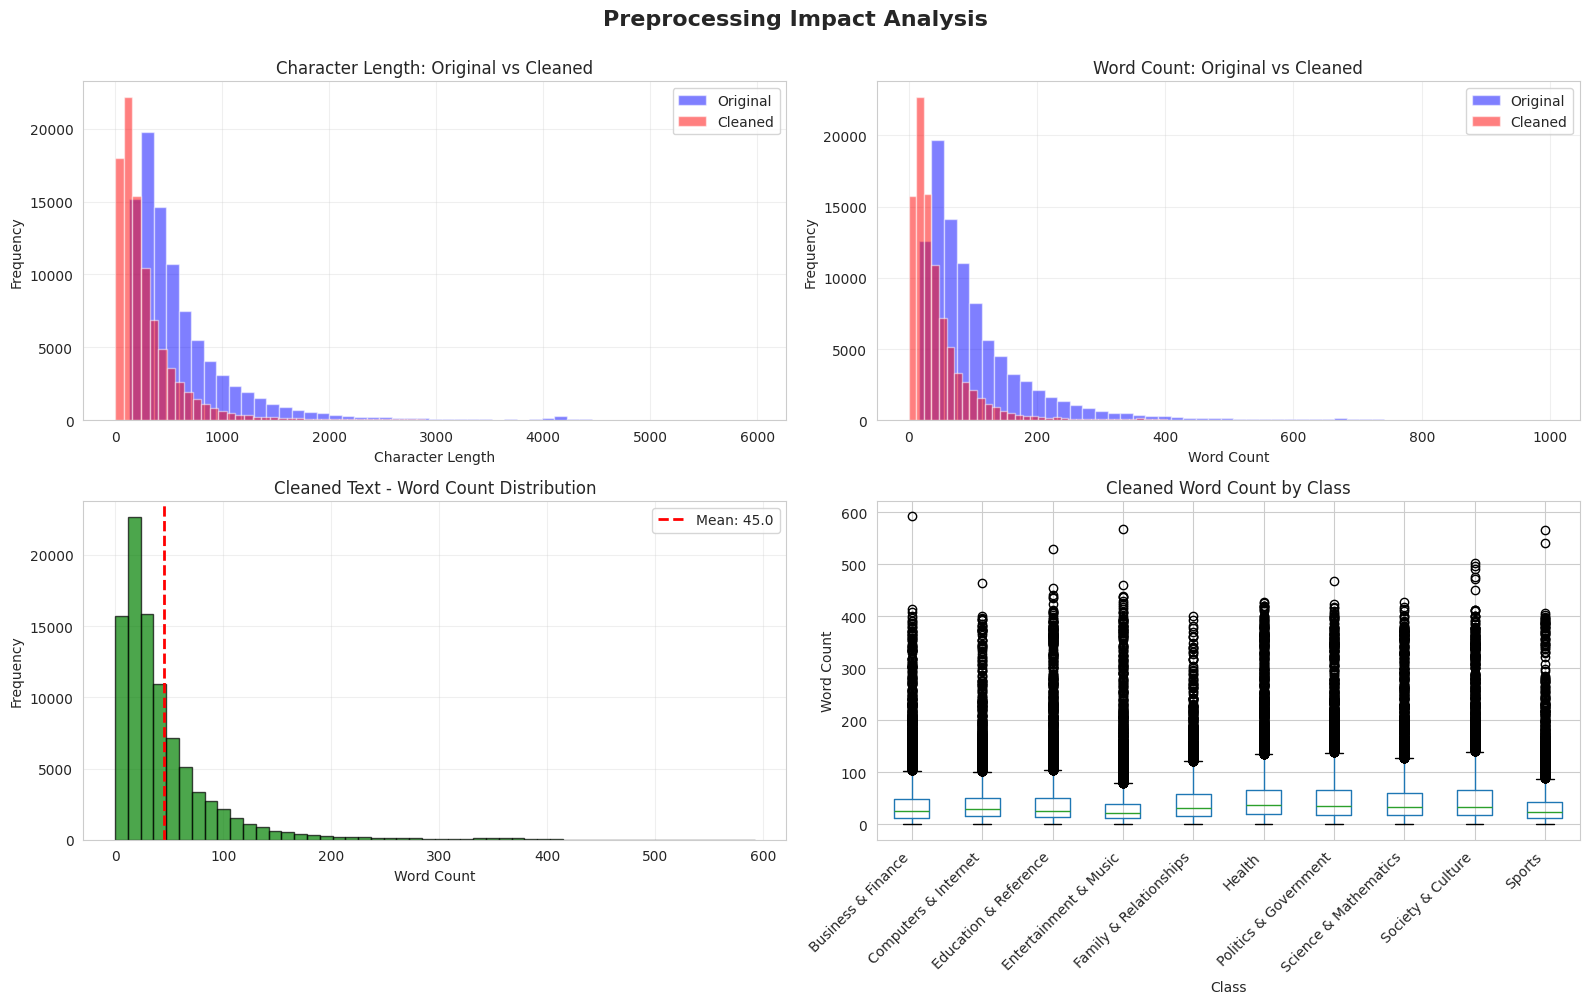

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Character length comparison
axes[0, 0].hist(train_df['original_length'], bins=50, alpha=0.5, label='Original', color='blue')
axes[0, 0].hist(train_df['cleaned_length'], bins=50, alpha=0.5, label='Cleaned', color='red')
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Character Length: Original vs Cleaned')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count comparison
axes[0, 1].hist(train_df['original_words'], bins=50, alpha=0.5, label='Original', color='blue')
axes[0, 1].hist(train_df['cleaned_words'], bins=50, alpha=0.5, label='Cleaned', color='red')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Word Count: Original vs Cleaned')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Cleaned word count distribution
axes[1, 0].hist(train_df['cleaned_words'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(train_df['cleaned_words'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: {train_df['cleaned_words'].mean():.1f}")
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Cleaned Text - Word Count Distribution')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Word count by class
train_df.boxplot(column='cleaned_words', by='Class', ax=axes[1, 1])
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_title('Cleaned Word Count by Class')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right')

plt.suptitle('Preprocessing Impact Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Top words after cleaning


Top 50 most frequent words:
--------------------------------------------------------------------------------
 1. get                  :   31,066 times
 2. like                 :   31,001 times
 3. one                  :   28,206 times
 4. would                :   27,144 times
 5. know                 :   27,001 times
 6. time                 :   20,903 times
 7. think                :   20,877 times
 8. people               :   20,541 times
 9. want                 :   19,848 times
10. good                 :   17,965 times
11. need                 :   17,568 times
12. make                 :   16,977 times
13. help                 :   16,962 times
14. year                 :   14,550 times
15. thing                :   13,910 times
16. also                 :   13,249 times
17. way                  :   13,135 times
18. say                  :   12,743 times
19. really               :   12,594 times
20. find                 :   12,112 times
21. work                 :   11,854 times
22. see 

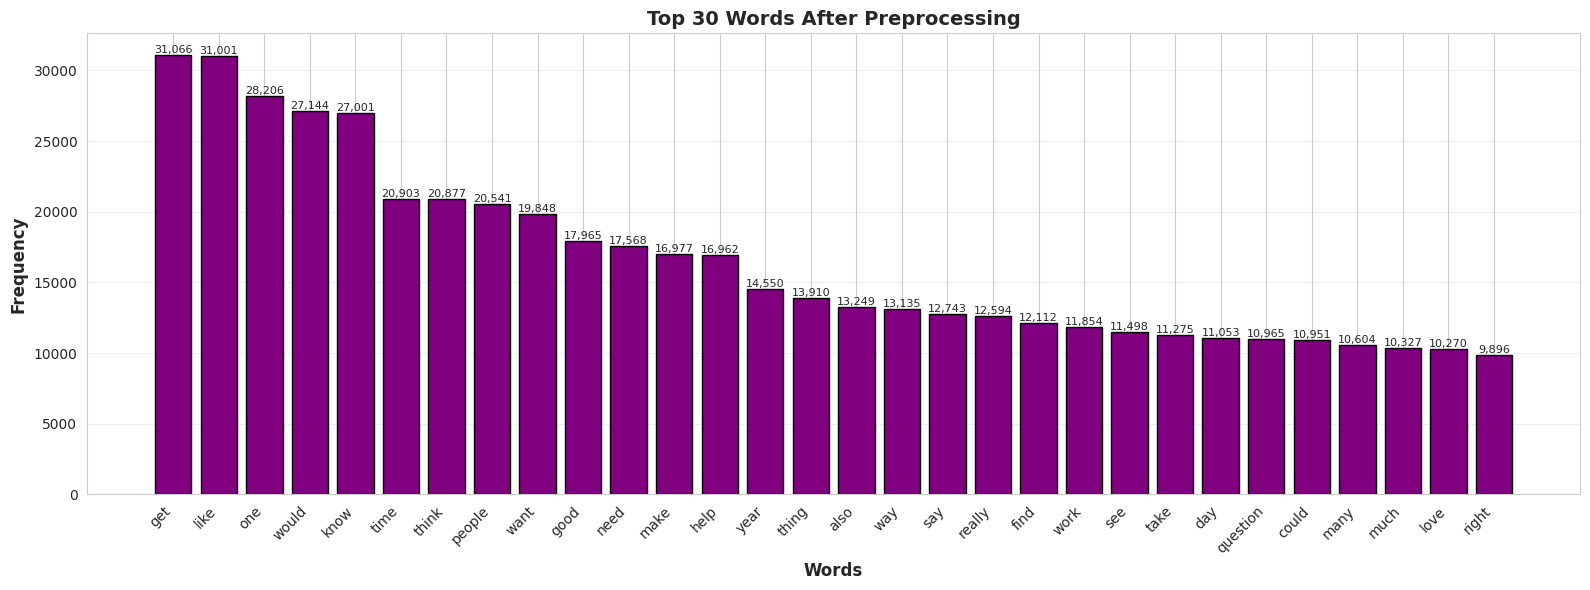

In [ ]:


from collections import Counter

all_words = []
for text in train_df['cleaned_text']:
    all_words.extend(text.split())

word_freq = Counter(all_words)
top_50 = word_freq.most_common(50)

print("\nTop 50 most frequent words:")
print("-" * 80)
for i, (word, count) in enumerate(top_50, 1):
    print(f"{i:2d}. {word:20s} : {count:8,d} times")

# Visualize
plt.figure(figsize=(16, 6))
words, counts = zip(*top_50[:30])
plt.bar(range(len(words)), counts, color='purple', edgecolor='black')
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Words After Preprocessing', fontsize=14, fontweight='bold')
plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Save Preprocessed data

In [ ]:



train_final = train_df[['QA Text', 'cleaned_text', 'Class']].copy()
test_final = test_df[['QA Text', 'cleaned_text', 'Class']].copy()

# Save
train_final.to_csv('/content/drive/MyDrive/nlp_project/Train_Preprocessed.csv', index=False)
test_final.to_csv('/content/drive/MyDrive/nlp_project/Test_Preprocessed.csv', index=False)

print("Saved: Train_Preprocessed.csv")
print("Saved: Test_Preprocessed.csv")

Saved: Train_Preprocessed.csv
Saved: Test_Preprocessed.csv




# Word Representation

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import pickle
from scipy import sparse
import warnings




In [ ]:


train_clean = pd.read_csv('/content/drive/MyDrive/nlp_project/Train_Preprocessed.csv')
test_clean = pd.read_csv('/content/drive/MyDrive/nlp_project/Test_Preprocessed.csv')

print(f"Training samples: {len(train_clean)}")
print(f"Testing samples: {len(test_clean)}")
print(f"Columns: {train_clean.columns.tolist()}")

# Handle missing values
train_clean['cleaned_text'] = train_clean['cleaned_text'].fillna('empty')
test_clean['cleaned_text'] = test_clean['cleaned_text'].fillna('empty')

# Prepare features and labels
X_train_full = train_clean['cleaned_text']
y_train_full = train_clean['Class']
X_test = test_clean['cleaned_text']
y_test = test_clean['Class']

print(f"Classes: {sorted(y_train_full.unique())}")
print(f"Number of classes: {y_train_full.nunique()}")

Training samples: 93333
Testing samples: 59999
Columns: ['QA Text', 'cleaned_text', 'Class']
Classes: ['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
Number of classes: 10


## Label Encode

In [ ]:



# Create label encoder
label_encoder = LabelEncoder()
y_train_full_encoded = label_encoder.fit_transform(y_train_full)
y_test_encoded = label_encoder.transform(y_test)

print("\nClass Mapping:")

for idx, class_name in enumerate(label_encoder.classes_):
    print(f"{idx}: {class_name}")

# Save label encoder
with open('/content/drive/MyDrive/nlp_project/label_encoder.pkl', 'wb') as f: pickle.dump(label_encoder, f)



Class Mapping:
0: Business & Finance
1: Computers & Internet
2: Education & Reference
3: Entertainment & Music
4: Family & Relationships
5: Health
6: Politics & Government
7: Science & Mathematics
8: Society & Culture
9: Sports


## Validation split

In [ ]:


# Split training data: 85% train, 15% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_encoded,
    test_size=0.15,
    random_state=42,
    stratify=y_train_full_encoded
)

print()
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X_train_full)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X_train_full)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples")



Training set: 79333 samples (85.0%)
Validation set: 14000 samples (15.0%)
Test set: 59999 samples


## TF-IDF VECTORIZATION

In [ ]:

# TF-IDF Configuration
print("\nTF-IDF Configuration:")
tfidf_params = {
    'max_features': 5000,
    'min_df': 2,
    'max_df': 0.9,
    'ngram_range': (1, 1)
}

for key, value in tfidf_params.items():
    print(f"  {key}: {value}")

# Create and fit TF-IDF vectorizer
print("Fitting TF-IDF vectorizer on training data...")
tfidf_vectorizer = TfidfVectorizer(**tfidf_params)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF vectorization complete!")

print(f"TF-IDF Matrix Shapes:")
print(f"Training:   {X_train_tfidf.shape} → ({X_train_tfidf.shape[0]} samples, {X_train_tfidf.shape[1]} features)")
print(f"Validation: {X_val_tfidf.shape}")
print(f"Testing:    {X_test_tfidf.shape}")

# Calculate sparsity
sparsity = 1.0 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))
print(f"Matrix sparsity: {sparsity:.4f} ({sparsity*100:.2f}% zeros)")
print(f"Non-zero elements: {X_train_tfidf.nnz:,}")

# Vocabulary statistics
vocabulary = tfidf_vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocabulary)}")
print(f"Sample features: {list(vocabulary[:20])}")

# save
with open('/content/drive/MyDrive/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

sparse.save_npz('/content/drive/MyDrive/nlp_project/X_train_tfidf.npz', X_train_tfidf)
sparse.save_npz('/content/drive/MyDrive/nlp_project/X_val_tfidf.npz', X_val_tfidf)
sparse.save_npz('/content/drive/MyDrive/nlp_project/X_test_tfidf.npz', X_test_tfidf)




TF-IDF Configuration:
  max_features: 5000
  min_df: 2
  max_df: 0.9
  ngram_range: (1, 1)
  sublinear_tf: True
Fitting TF-IDF vectorizer on training data...
TF-IDF vectorization complete!
TF-IDF Matrix Shapes:
Training:   (79333, 5000) → (79333 samples, 5000 features)
Validation: (14000, 5000)
Testing:    (59999, 5000)
Matrix sparsity: 0.9943 (99.43% zeros)
Non-zero elements: 2,255,674
Vocabulary size: 5000
Sample features: ['ab', 'abc', 'abdominal', 'ability', 'able', 'abnormal', 'abortion', 'abraham', 'abroad', 'absence', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abt', 'abuse', 'abused', 'abusive', 'academic', 'academy']


### Analyze TF IDF Features


Top 30 TF-IDF Features (by average score):
--------------------------------------------------------------------------------
 1. like                 : 0.021109
 2. get                  : 0.021037
 3. know                 : 0.020309
 4. one                  : 0.018765
 5. would                : 0.018254
 6. think                : 0.017441
 7. want                 : 0.015478
 8. good                 : 0.015175
 9. people               : 0.014791
10. time                 : 0.014608
11. need                 : 0.014237
12. help                 : 0.013987
13. make                 : 0.013352
14. find                 : 0.012777
15. year                 : 0.011503
16. really               : 0.011417
17. thing                : 0.011200
18. way                  : 0.011059
19. say                  : 0.010963
20. question             : 0.010846
21. best                 : 0.010689
22. love                 : 0.010314
23. work                 : 0.010046
24. anyone               : 0.009954
25. see    

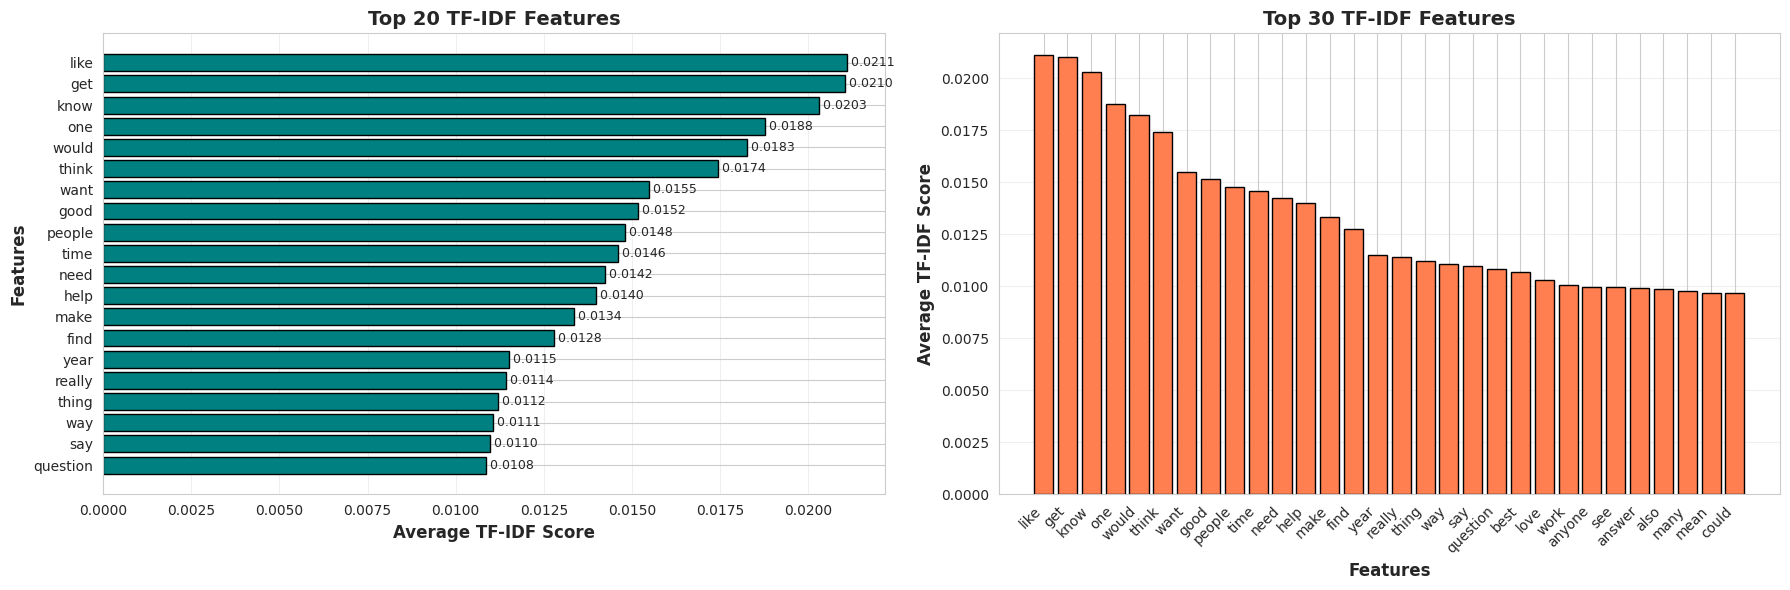

In [ ]:




# Calculate average TF-IDF scores
tfidf_mean = np.asarray(X_train_tfidf.mean(axis=0)).ravel()
top_indices = np.argsort(tfidf_mean)[-30:][::-1]
top_features = [(vocabulary[i], tfidf_mean[i]) for i in top_indices]

print("\nTop 30 TF-IDF Features (by average score):")
print("-" * 80)
for i, (feature, score) in enumerate(top_features, 1):
    print(f"{i:2d}. {feature:20s} : {score:.6f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Horizontal bar chart
features_20, scores_20 = zip(*top_features[:20])
axes[0].barh(range(len(features_20)), scores_20, color='teal', edgecolor='black')
axes[0].set_yticks(range(len(features_20)))
axes[0].set_yticklabels(features_20)
axes[0].invert_yaxis()
axes[0].set_xlabel('Average TF-IDF Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0].set_title('Top 20 TF-IDF Features', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add values
for i, score in enumerate(scores_20):
    axes[0].text(score, i, f' {score:.4f}', va='center', fontsize=9)

# Vertical bar chart
features_30, scores_30 = zip(*top_features)
axes[1].bar(range(len(features_30)), scores_30, color='coral', edgecolor='black')
axes[1].set_xticks(range(len(features_30)))
axes[1].set_xticklabels(features_30, rotation=45, ha='right')
axes[1].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average TF-IDF Score', fontsize=12, fontweight='bold')
axes[1].set_title('Top 30 TF-IDF Features', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## W2V-SKIPGRAM

In [ ]:


# Tokenize all texts for Word2Vec training
print("Tokenizing sentences for Word2Vec...")
all_sentences = [text.split() for text in X_train_full if text.strip()]
print(f"Total sentences: {len(all_sentences)}")
print(f"Sample sentence: {all_sentences[0][:15]}...")

# Calculate vocabulary statistics
all_words_flat = [word for sentence in all_sentences for word in sentence]
unique_words = set(all_words_flat)
print(f"Total words: {len(all_words_flat):,}")
print(f"Unique words: {len(unique_words):,}")
print(f"Average sentence length: {np.mean([len(s) for s in all_sentences]):.2f} words")

Tokenizing sentences for Word2Vec...
Total sentences: 93333
Sample sentence: ['name', 'bone', 'human', 'body', 'bone', 'human', 'body', 'nskull', 'axial', 'skeleton', 'ncranial', 'bone', 'parietal', 'temporal', 'frontal']...
Total words: 4,199,355
Unique words: 138,997
Average sentence length: 44.99 words


### Training Skipgram

In [ ]:

# Word2Vec configuration
w2v_params = {
    'vector_size': 100,       # Embedding dimension
    'window': 5,              # Context window size
    'min_count': 2,           # Ignore words appearing < 2 times
    'workers': 4,             # CPU cores for training
    'sg': 1,                  # 1 = Skip-gram
    'epochs': 10,             # Training epochs
    'seed': 42,               # For reproducibility
    'negative': 5,            # Negative sampling
    'ns_exponent': 0.75       # Negative sampling exponent
}

print("Word2Vec Configuration:")
for key, value in w2v_params.items():
    print(f"  {key}: {value}")





w2v_model = Word2Vec(
    sentences=all_sentences,
    **w2v_params
)

print("Word2Vec training complete!")

# Model statistics
print(f"Word2Vec Model Statistics:")
print(f"  Vocabulary size: {len(w2v_model.wv):,}")
print(f"  Vector dimension: {w2v_model.wv.vector_size}")
print(f"  Total parameters: {len(w2v_model.wv) * w2v_model.wv.vector_size:,}")

# Save model

w2v_model.save('/content/drive/MyDrive/nlp_project/word2vec_skipgram.model')


Word2Vec Configuration:
  vector_size: 100
  window: 5
  min_count: 2
  workers: 4
  sg: 1
  epochs: 10
  seed: 42
  negative: 5
  ns_exponent: 0.75
Word2Vec training complete!
Word2Vec Model Statistics:
  Vocabulary size: 64,674
  Vector dimension: 100
  Total parameters: 6,467,400


In [ ]:
w2v_model.wv["people"]

array([-0.01511652,  0.12126703, -0.05882672,  0.14993632, -0.14853814,
        0.34649897, -0.52158   ,  0.41226926, -0.08744419,  0.15575723,
       -0.34168714,  0.3529828 ,  0.14357781,  0.30718225, -0.19053124,
        0.13455622,  0.21285129, -0.1510505 , -0.3551696 , -0.04462857,
       -0.25367707,  0.33060464,  0.43351302,  0.07248981,  0.26607063,
       -0.07041875, -0.28125858, -0.1999089 ,  0.20772251,  0.1720241 ,
        0.07843179, -0.5609893 ,  0.21288127,  0.04542461, -0.06031242,
       -0.30570602,  0.20909269, -0.24875845, -0.3139179 ,  0.43919703,
        0.3663666 , -0.20946334,  0.52877915, -0.24184331,  0.080707  ,
       -0.23010251,  0.2636373 , -0.02951411,  0.48210377, -0.29406947,
        0.19482446, -0.4434702 , -0.4271917 ,  0.14261054,  0.14355837,
        0.31242666,  0.02903736, -0.2063922 , -0.16819607,  0.2672535 ,
       -0.03774367,  0.10631356, -0.1782265 , -0.00780597, -0.05841073,
        0.1324109 ,  0.22485703, -0.4219706 , -0.05952511, -0.01

###Word2Vec analysis


Word Similarity Examples:
--------------------------------------------------------------------------------

Most similar to 'computer':
  laptop          → 0.7947
  rebooting       → 0.7688
  software        → 0.7602
  installed       → 0.7581
  reinstalled     → 0.7579

Most similar to 'game':
  play            → 0.7398
  preseason       → 0.7367
  team            → 0.7338
  interleague     → 0.7277
  playing         → 0.7131

Most similar to 'health':
  naffordable     → 0.7504
  wellness        → 0.7436
  inpatient       → 0.7058
  hse             → 0.7009
  hospice         → 0.6903

Most similar to 'science':
  biology         → 0.7408
  mathematics     → 0.7256
  astrophysics    → 0.7256
  study           → 0.7239
  nscience        → 0.7149

Most similar to 'business':
  marketing       → 0.7230
  shoestring      → 0.7208
  housecleaning   → 0.7131
  bplans          → 0.7072
  sba             → 0.7066

Most similar to 'family':
  dowry           → 0.7035
  childless       → 0.674

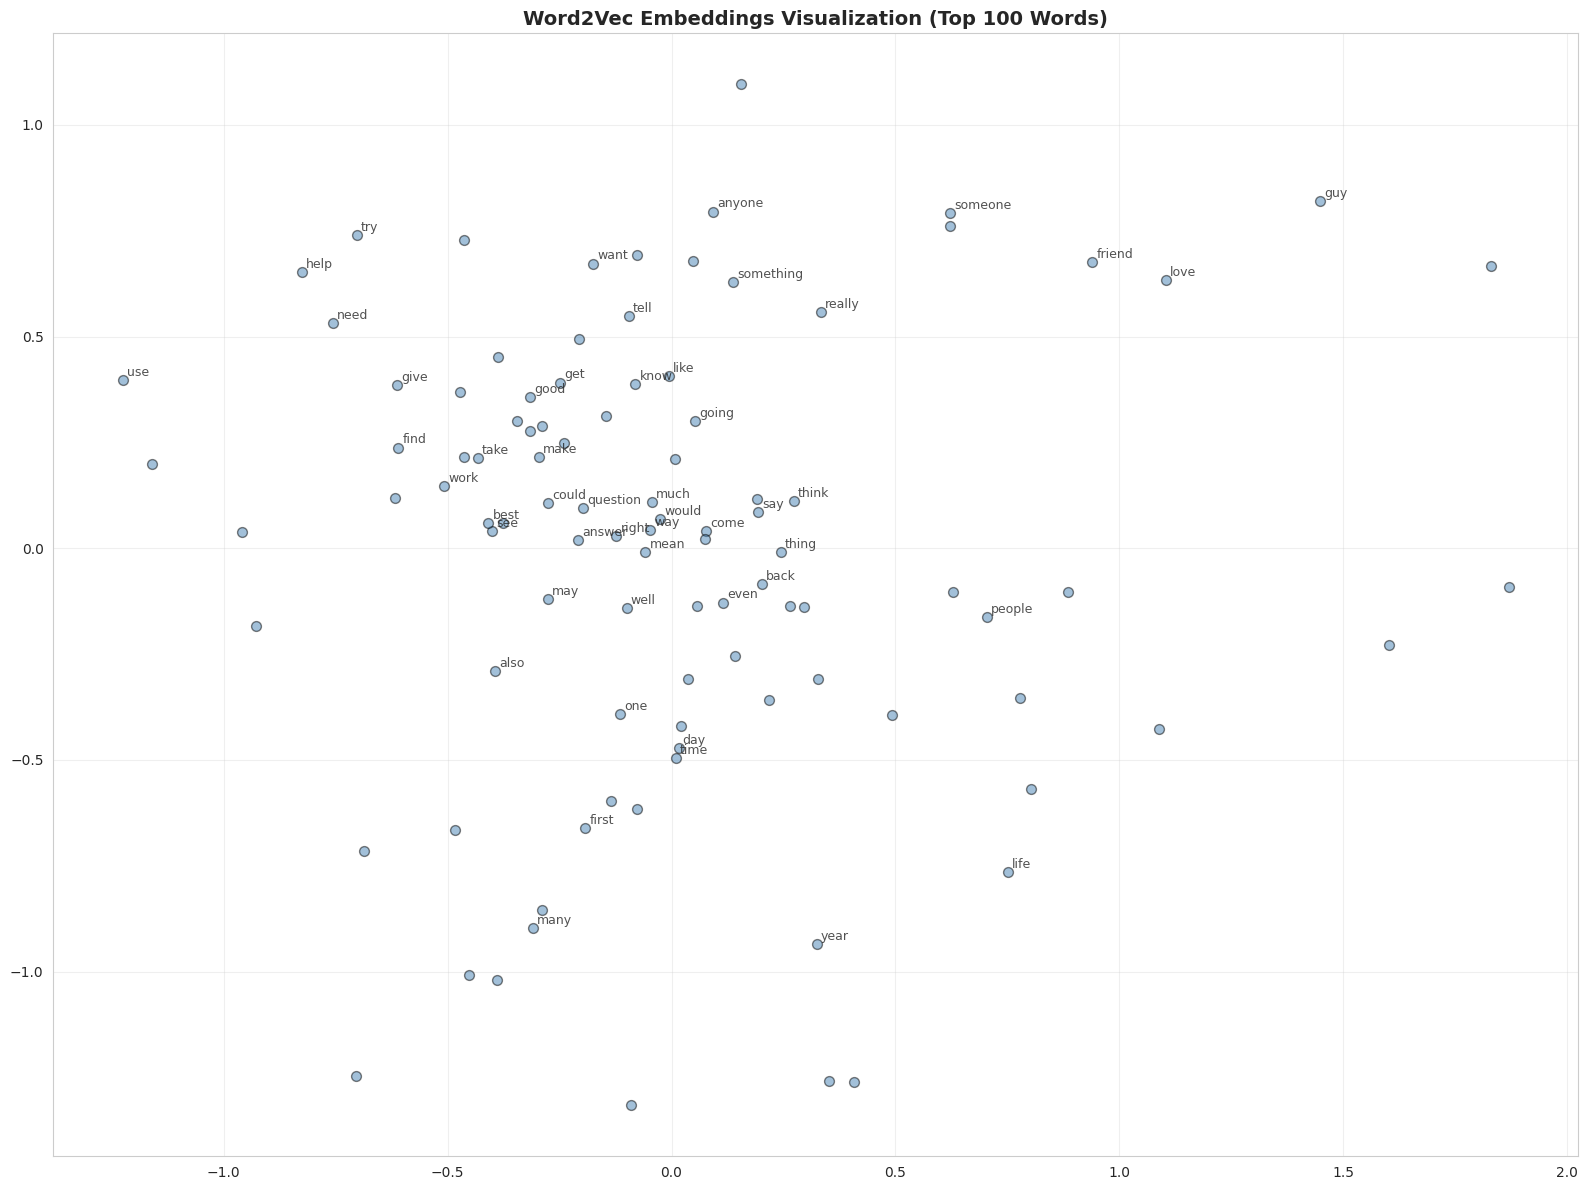

In [ ]:


# Test word similarity
test_words = ['computer', 'game', 'health', 'science', 'business',
              'family', 'sport', 'music', 'education', 'government']

print("\nWord Similarity Examples:")
print("-" * 80)

for word in test_words:
    if word in w2v_model.wv:
        print(f"\nMost similar to '{word}':")
        similar = w2v_model.wv.most_similar(word, topn=5)
        for similar_word, score in similar:
            print(f"  {similar_word:15s} → {score:.4f}")
    else:
        print(f"\n'{word}' not in vocabulary")

# Visualize embeddings with PCA

from sklearn.decomposition import PCA

# Get top 100 most frequent words
sample_words = [word for word in w2v_model.wv.index_to_key[:100]]
word_vectors = np.array([w2v_model.wv[word] for word in sample_words])

# Apply PCA
pca = PCA(n_components=2, random_state=42)
word_vectors_2d = pca.fit_transform(word_vectors)


# Plot
plt.figure(figsize=(16, 12))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1],
           alpha=0.5, s=50, c='steelblue', edgecolors='black')

# Annotate words
for i, word in enumerate(sample_words[:50]):  # Show first 50
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
                xytext=(3, 3), textcoords='offset points',
                fontsize=9, alpha=0.8)


plt.title('Word2Vec Embeddings Visualization (Top 100 Words)',
         fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Create Document Embedding

In [ ]:


def get_document_vector(text, model, vector_size):

    tokens = text.split()
    vectors = [model.wv[token] for token in tokens if token in model.wv]

    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

print("Creating document embeddings...")
print("This may take a few minutes for 93,333 samples...")

# Process in chunks
chunk_size = 10000
vector_size = w2v_params['vector_size']

# Training set
X_train_w2v_list = []
for i in range(0, len(X_train), chunk_size):
    chunk = X_train.iloc[i:i+chunk_size]
    chunk_vectors = [get_document_vector(text, w2v_model, vector_size) for text in chunk]
    X_train_w2v_list.extend(chunk_vectors)
    progress = min(i + chunk_size, len(X_train))
    print(f"  Training: {progress}/{len(X_train)} ({progress/len(X_train)*100:.1f}%)")

X_train_w2v = np.array(X_train_w2v_list)

# Validation set
print("Processing validation set...")
X_val_w2v = np.array([get_document_vector(text, w2v_model, vector_size)
                       for text in X_val])

# Test set
print("Processing test set...")
X_test_w2v = np.array([get_document_vector(text, w2v_model, vector_size)
                        for text in X_test])



print(f"\nDocument Embedding Shapes:")
print(f"  Training:   {X_train_w2v.shape}")
print(f"  Validation: {X_val_w2v.shape}")
print(f"  Testing:    {X_test_w2v.shape}")

# Save document embeddings

np.save('/content/drive/MyDrive/nlp_project/X_train_w2v.npy', X_train_w2v)
np.save('/content/drive/MyDrive/nlp_project/X_val_w2v.npy', X_val_w2v)
np.save('/content/drive/MyDrive/nlp_project/X_test_w2v.npy', X_test_w2v)



Creating document embeddings...
This may take a few minutes for 93,333 samples...
  Training: 10000/79333 (12.6%)
  Training: 20000/79333 (25.2%)
  Training: 30000/79333 (37.8%)
  Training: 40000/79333 (50.4%)
  Training: 50000/79333 (63.0%)
  Training: 60000/79333 (75.6%)
  Training: 70000/79333 (88.2%)
  Training: 79333/79333 (100.0%)
Processing validation set...
Processing test set...

Document Embedding Shapes:
  Training:   (79333, 100)
  Validation: (14000, 100)
  Testing:    (59999, 100)


In [ ]:
w2v_model.wv["people"]

array([-0.01511652,  0.12126703, -0.05882672,  0.14993632, -0.14853814,
        0.34649897, -0.52158   ,  0.41226926, -0.08744419,  0.15575723,
       -0.34168714,  0.3529828 ,  0.14357781,  0.30718225, -0.19053124,
        0.13455622,  0.21285129, -0.1510505 , -0.3551696 , -0.04462857,
       -0.25367707,  0.33060464,  0.43351302,  0.07248981,  0.26607063,
       -0.07041875, -0.28125858, -0.1999089 ,  0.20772251,  0.1720241 ,
        0.07843179, -0.5609893 ,  0.21288127,  0.04542461, -0.06031242,
       -0.30570602,  0.20909269, -0.24875845, -0.3139179 ,  0.43919703,
        0.3663666 , -0.20946334,  0.52877915, -0.24184331,  0.080707  ,
       -0.23010251,  0.2636373 , -0.02951411,  0.48210377, -0.29406947,
        0.19482446, -0.4434702 , -0.4271917 ,  0.14261054,  0.14355837,
        0.31242666,  0.02903736, -0.2063922 , -0.16819607,  0.2672535 ,
       -0.03774367,  0.10631356, -0.1782265 , -0.00780597, -0.05841073,
        0.1324109 ,  0.22485703, -0.4219706 , -0.05952511, -0.01

###Save labels

In [ ]:


np.save('/content/drive/MyDrive/nlp_project/y_train.npy', y_train)
np.save('/content/drive/MyDrive/nlp_project/y_val.npy', y_val)
np.save('/content/drive/MyDrive/nlp_project/y_test.npy', y_test_encoded)

print("✓ Labels saved!")



STEP 10: SAVING LABELS
✓ Labels saved!


# Model Training

##  load corresponding files

In [ ]:
# Load TF-IDF features
from google.colab import drive

drive.mount('/content/drive')
from scipy import sparse
X_train_tfidf = sparse.load_npz('/content/drive/MyDrive/nlp_project/X_train_tfidf.npz')
X_val_tfidf = sparse.load_npz('/content/drive/MyDrive/nlp_project/X_val_tfidf.npz')
X_test_tfidf = sparse.load_npz('/content/drive/MyDrive/nlp_project/X_test_tfidf.npz')

# Load corresponding labels
import numpy as np

y_train = np.load('/content/drive/MyDrive/nlp_project/y_train.npy')
y_val = np.load('/content/drive/MyDrive/nlp_project/y_val.npy')
y_test = np.load('/content/drive/MyDrive/nlp_project/y_test.npy')


# Use together:
# X_train_tfidf with y_train
# X_val_tfidf with y_val
# X_test_tfidf with y_test




# Load Word2Vec document embeddings
import numpy as np
X_train_w2v = np.load('/content/drive/MyDrive/nlp_project/X_train_w2v.npy')
X_val_w2v = np.load('/content/drive/MyDrive/nlp_project/X_val_w2v.npy')
X_test_w2v = np.load('/content/drive/MyDrive/nlp_project/X_test_w2v.npy')

# Load corresponding labels (SAME as above!)



# y_train = np.load('/content/drive/MyDrive/y_train.npy')
# y_val = np.load('/content/drive/MyDrive/y_val.npy')
# y_test = np.load('/content/drive/MyDrive/y_test.npy')

# Use together:
# X_train_w2v with y_train
# X_val_w2v with y_val
# X_test_w2v with y_test

Mounted at /content/drive


###Model Evaluation Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # TEST PREDICTIONS
    y_test_probs = model.predict(X_test)
    y_test_pred = np.argmax(y_test_probs, axis=1)

    # TRAIN PREDICTIONS
    y_train_probs = model.predict(X_train)
    y_train_pred = np.argmax(y_train_probs, axis=1)

    # METRICS
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average="macro")
    f1_train = f1_score(y_train, y_train_pred, average="macro")

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_test_pred)

    # CLASSIFICATION REPORT
    report = classification_report(y_test, y_test_pred, output_dict=True)

    print(f"\n================ {model_name} =================")
    print(f"Train Macro F1-score: {f1_train:.4f}")
    print(f"Test  Macro F1-score: {f1_test:.4f}")
    print(f"Test Accuracy:        {test_accuracy:.4f}\n")

    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # TRAIN vs TEST F1 BAR PLOT
    plt.figure()
    plt.bar(["Train F1", "Test F1"], [f1_train, f1_test])
    plt.ylim(0, 1)
    plt.ylabel("F1-score")
    plt.title(f"Train vs Test F1-score - {model_name}")
    plt.show()

    # CONFUSION MATRIX PLOT
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="viridis", colorbar=True)

    ax.grid(False)
    ax.minorticks_off()

    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # CLASS-WISE F1 SCORES
    df = pd.DataFrame(report).transpose()

    plt.figure()
    df["f1-score"][:-3].plot(kind="bar")
    plt.ylim(0, 1)
    plt.ylabel("F1-score")
    plt.title(f"Class-wise F1 Scores - {model_name}")
    plt.show()

    # TRAIN vs VALIDATION CURVES (ONLY FOR NN)
    if hasattr(model, "history") and model.history is not None:
        history = model.history.history

        # Accuracy
        if "accuracy" in history and "val_accuracy" in history:
            plt.figure()
            plt.plot(history["accuracy"], label="Train Accuracy")
            plt.plot(history["val_accuracy"], label="Validation Accuracy")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.title(f"Train vs Validation Accuracy - {model_name}")
            plt.legend()
            plt.show()

        # Loss
        if "loss" in history and "val_loss" in history:
            plt.figure()
            plt.plot(history["loss"], label="Train Loss")
            plt.plot(history["val_loss"], label="Validation Loss")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title(f"Train vs Validation Loss - {model_name}")
            plt.legend()
            plt.show()

    return f1_train, f1_test, cm, report


#**Logistic Regression (Using TFIDF)**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.6741112351872531
F1-score (macro): 0.6715197646244379


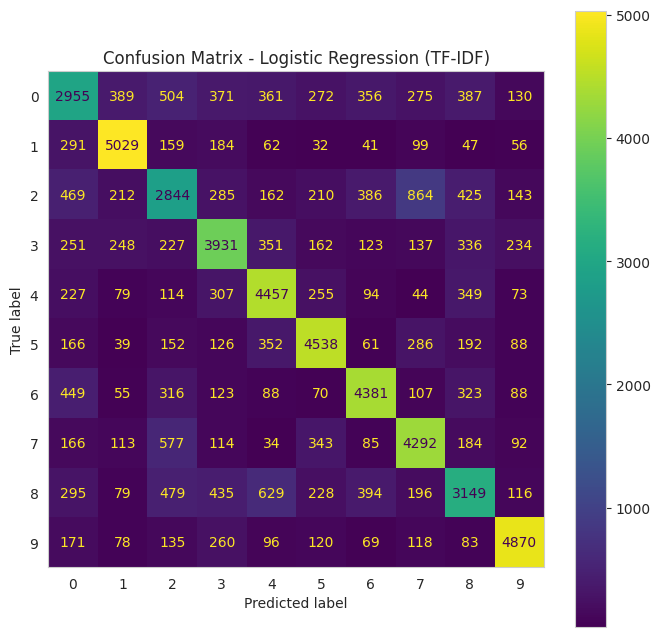


Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.49      0.52      6000
           1       0.80      0.84      0.82      6000
           2       0.52      0.47      0.49      6000
           3       0.64      0.66      0.65      6000
           4       0.68      0.74      0.71      5999
           5       0.73      0.76      0.74      6000
           6       0.73      0.73      0.73      6000
           7       0.67      0.72      0.69      6000
           8       0.58      0.52      0.55      6000
           9       0.83      0.81      0.82      6000

    accuracy                           0.67     59999
   macro avg       0.67      0.67      0.67     59999
weighted avg       0.67      0.67      0.67     59999



In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import matplotlib.pyplot as plt


# Predictions

y_pred = lr_model.predict(X_test_tfidf)

# Accuracy & F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="viridis", colorbar=True)

# Remove matrix lines
ax.grid(False)
ax.minorticks_off()

plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


#**Deep Neural Network Using TFIDF**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_tfidf.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(
    X_train_tfidf, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_tfidf, y_val),
    callbacks=[es],
    verbose=1
)

Epoch 1/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.5201 - loss: 1.4783 - val_accuracy: 0.6648 - val_loss: 1.0522
Epoch 2/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7098 - loss: 0.9222 - val_accuracy: 0.6676 - val_loss: 1.0560
Epoch 3/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7437 - loss: 0.8109 - val_accuracy: 0.6571 - val_loss: 1.0900
Epoch 4/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7758 - loss: 0.7023 - val_accuracy: 0.6554 - val_loss: 1.1579


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step

================ Dense Neural Network (TF IDF) =================
Train Macro F1-score: 0.7272
Test  Macro F1-score: 0.6677
Test Accuracy:        0.6703

Confusion Matrix:
[[2714  428  583  273  332  351  335  328  517  139]
 [ 288 5085  166  144   54   22   35   99   49   58]
 [ 327  220 2931  198  121  229  390  915  519  150]
 [ 170  313  228 3582  344  225  144  173  589  232]
 [ 149   84  134  217 4278  355   86   36  565   95]
 [ 115   23  149   83  293 4671   44  296  222  104]
 [ 436   61  348   80   76   95 4312  118  402   72]
 [ 106  126  586   78   28  356   77 4390  162   91]
 [ 180   80  557  284  500  328  359  199 3417   96]
 [  99   96  213  247   87  149   68  114   89 4838]]

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      6000
           1       0.78      0.85      0.81      6000
           2       0.50

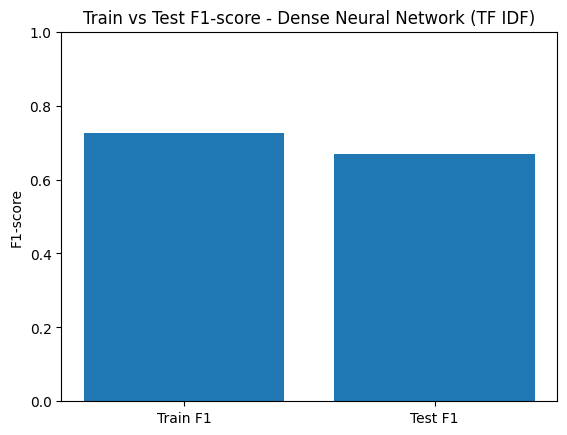

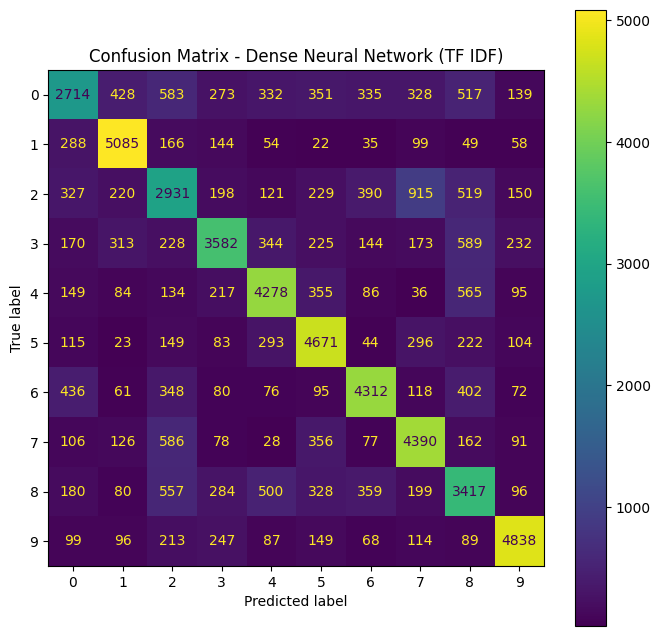

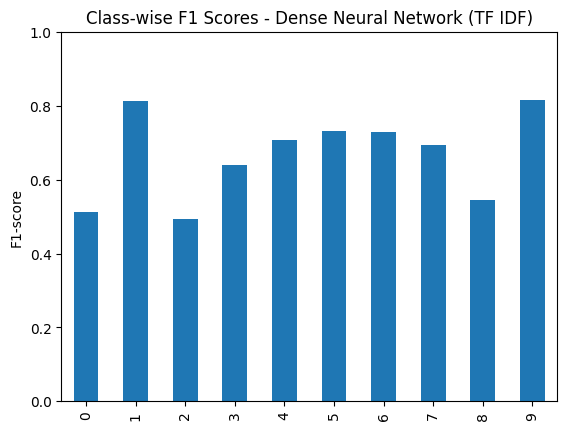

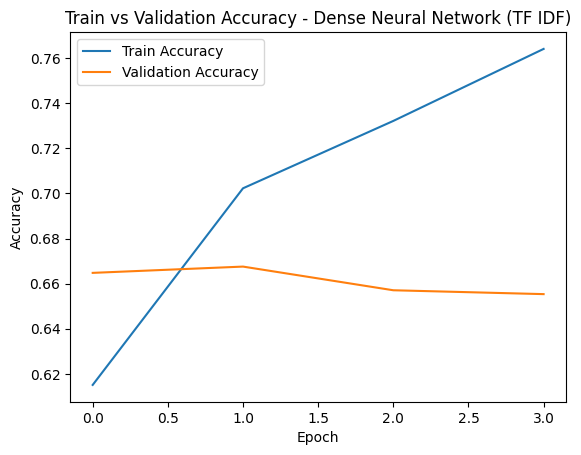

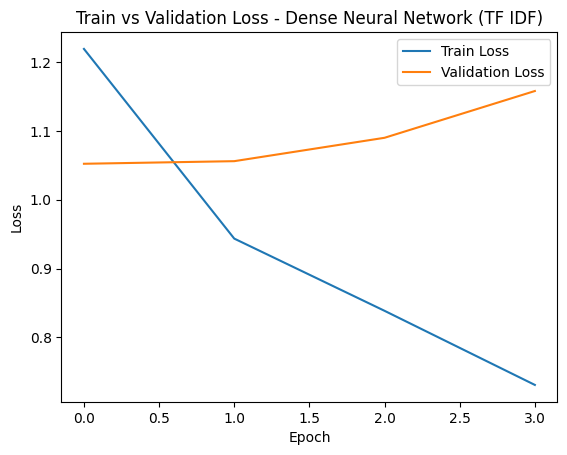

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_tfidf,
    y_train=y_train,
    X_test=X_test_tfidf,
    y_test=y_test,
    model_name="Dense Neural Network (TF IDF)"
)


#Deep Neural Network Using Skip Gram

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_w2v.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,594 (92.16 KB)

 Trainable params: 23,594 (92.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(
    X_train_w2v, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_w2v, y_val),
    callbacks=[es],
    verbose=1
)

Epoch 1/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5584 - loss: 1.3991 - val_accuracy: 0.6706 - val_loss: 1.0362
Epoch 2/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6710 - loss: 1.0427 - val_accuracy: 0.6743 - val_loss: 1.0088
Epoch 3/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6751 - loss: 1.0179 - val_accuracy: 0.6778 - val_loss: 0.9978
Epoch 4/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6823 - loss: 0.9990 - val_accuracy: 0.6801 - val_loss: 0.9874
Epoch 5/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6834 - loss: 0.9828 - val_accuracy: 0.6770 - val_loss: 0.9941
Epoch 6/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6917 - loss: 0.9674 - val_accuracy: 0.6833 - val_loss: 0.9818
Epoch 7/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6919 - loss: 0.9612 - val_accuracy: 0.6854 - val_loss: 0.9720
Epoch 8/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6932 - loss: 0.9596 - 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

================ Dense Neural Network (Word2Vec) =================
Train Macro F1-score: 0.6960
Test  Macro F1-score: 0.6864
Test Accuracy:        0.6933

Confusion Matrix:
[[2534  596  524  388  393  279  372  264  462  188]
 [ 118 5400   97  132   44   19   26   72   43   49]
 [ 285  299 2768  274  147  239  424  901  497  166]
 [  82  360  205 4013  302  116  120  106  421  275]
 [ 100  116  108  314 4536  231   98   20  391   85]
 [  72   29  100  122  367 4778   45  215  199   73]
 [ 320   82  221  105  104   68 4549   94  349  108]
 [  67  163  476   91   31  367   67 4461  186   91]
 [ 116  112  484  412  634  213  343  149 3428  109]
 [  47   82   80  246   66  122   61  106   61 5129]]

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      6000
           1       0.75      0.90      0.82      6000
           2       0.

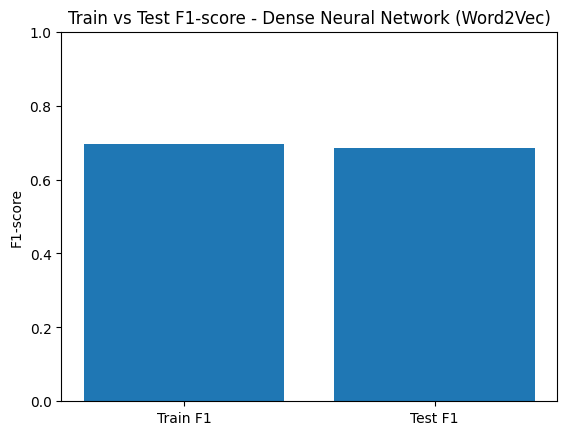

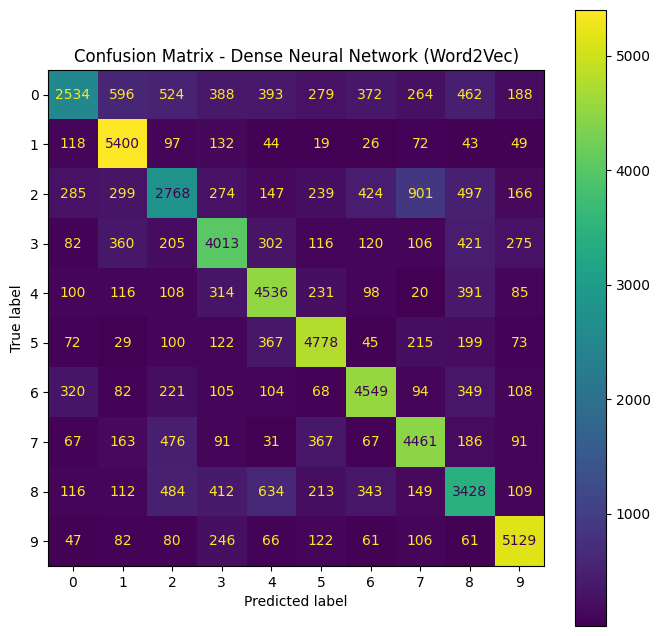

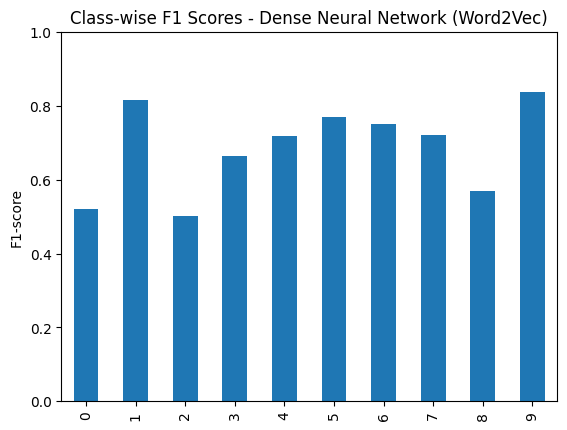

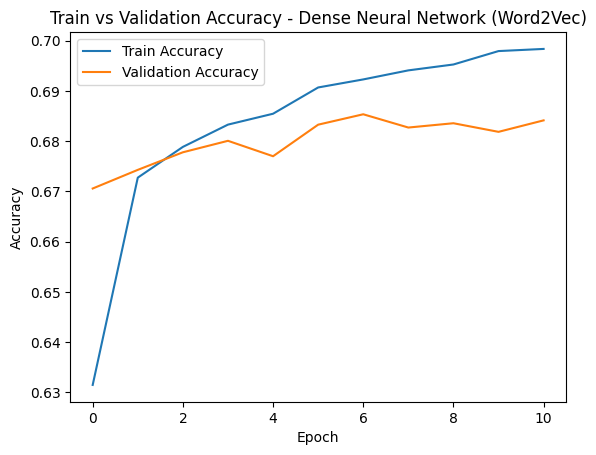

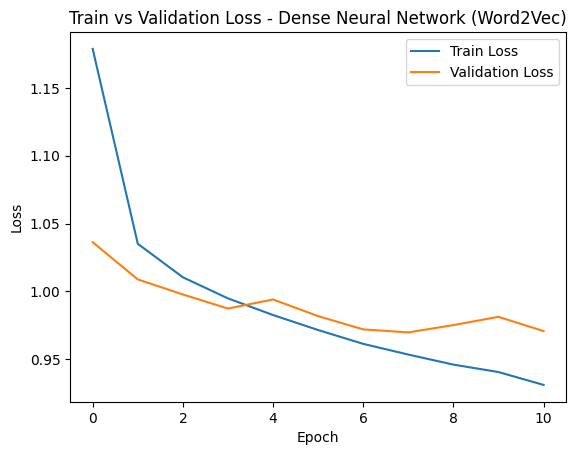

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_w2v,
    y_train=y_train,
    X_test=X_test_w2v,
    y_test=y_test,
    model_name="Dense Neural Network (Word2Vec)"
)


#Simple RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Reshape Word2Vec embeddings
X_train_rnn = X_train_w2v.reshape(X_train_w2v.shape[0], 1, X_train_w2v.shape[1])
X_val_rnn   = X_val_w2v.reshape(X_val_w2v.shape[0], 1, X_val_w2v.shape[1])
X_test_rnn  = X_test_w2v.reshape(X_test_w2v.shape[0], 1, X_test_w2v.shape[1])


y_train_split = np.load('/content/drive/MyDrive/nlp_project/y_train.npy')
y_val_split   = np.load('/content/drive/MyDrive/nlp_project/y_val.npy')


model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    SimpleRNN(128, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])


model.compile(
    optimizer=Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5965 - loss: 1.2842 - val_accuracy: 0.6699 - val_loss: 1.0293
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6755 - loss: 1.0235 - val_accuracy: 0.6734 - val_loss: 1.0159
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6753 - loss: 1.0187 - val_accuracy: 0.6763 - val_loss: 1.0006
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6774 - loss: 1.0085 - val_accuracy: 0.6746 - val_loss: 1.0100
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6803 - loss: 1.0041 - val_accuracy: 0.6816 - val_loss: 0.9951
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6836 - loss: 0.9959 - val_accuracy: 0.6792 - val_loss: 0.9964
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6872 - loss: 0.9795 - val_accuracy: 0.6766 - val_loss: 0.9998
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6813 - loss: 0.9903 

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,656 (447.88 KB)

 Trainable params: 38,218 (149.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,438 (298.59 KB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

================ Unidirectional RNN (Word2Vec) =================
Train Macro F1-score: 0.6838
Test  Macro F1-score: 0.6793
Test Accuracy:        0.6892

Confusion Matrix:
[[2362  446  453  464  488  243  661  347  350  186]
 [ 131 5234  119  180   78   22   50   83   40   63]
 [ 218  245 2543  348  199  180  607 1065  422  173]
 [  77  232  130 4167  396  107  173  163  253  302]
 [  64   93  100  340 4706  178  160   36  221  101]
 [  59   17  118  131  506 4505   85  373  121   85]
 [ 181   47  138  106   85   44 4939  143  224   93]
 [  56  131  286  131   41  260   95 4750  154   96]
 [  90   79  391  528  790  177  580  236 3014  115]
 [  45   58   50  253   78  100  101  137   45 5133]]

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.39      0.51      6000
           1       0.80      0.87      0.83      6000
           2       0.59

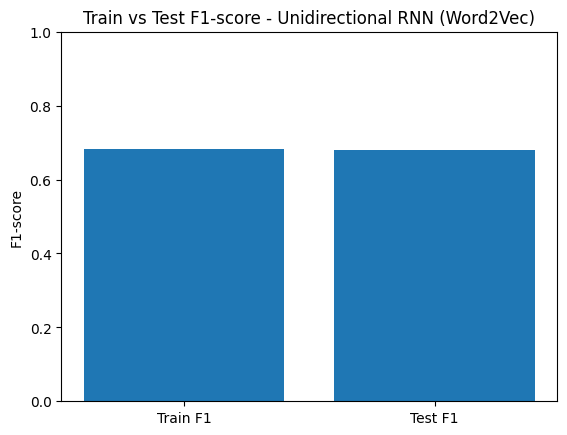

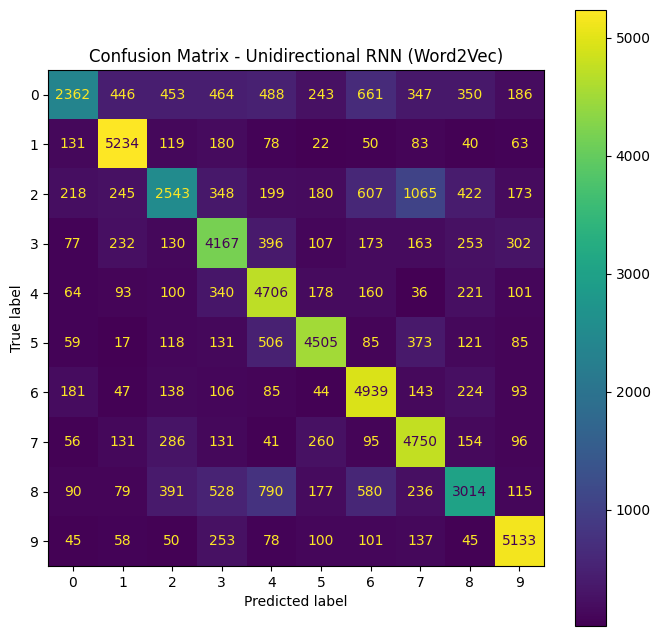

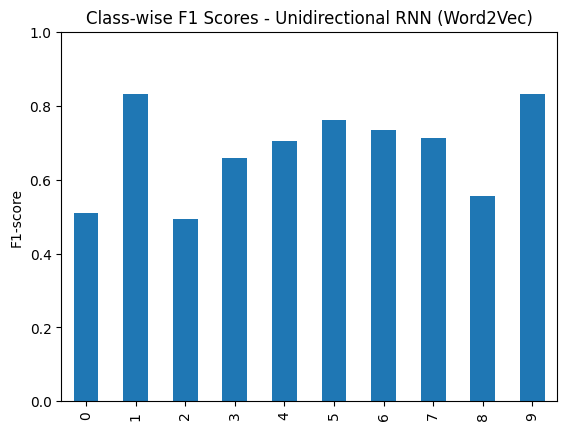

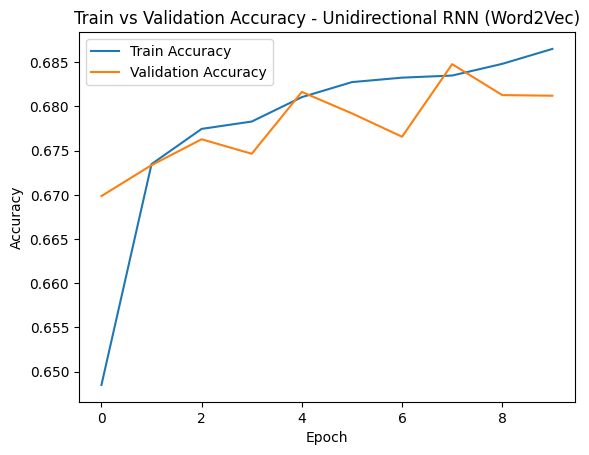

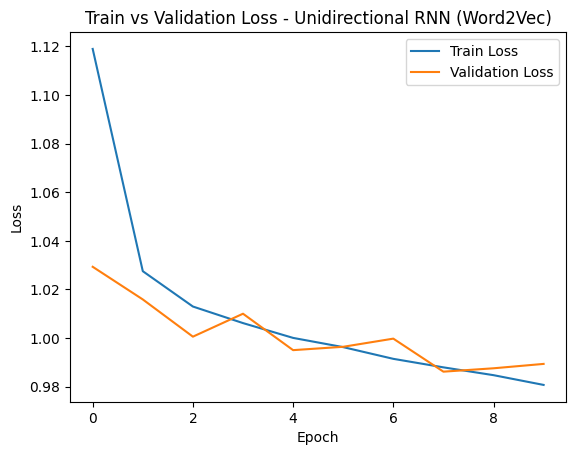

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="Unidirectional RNN (Word2Vec)"
)


#Bidirectional RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam

# Reshape Word2Vec embeddings
X_train_rnn = X_train_w2v.reshape(X_train_w2v.shape[0], 1, X_train_w2v.shape[1])
X_val_rnn   = X_val_w2v.reshape(X_val_w2v.shape[0], 1, X_val_w2v.shape[1])
X_test_rnn  = X_test_w2v.reshape(X_test_w2v.shape[0], 1, X_test_w2v.shape[1])

# Explicitly load the split labels
y_train_split = np.load('/content/drive/MyDrive/nlp_project/y_train.npy')
y_val_split   = np.load('/content/drive/MyDrive/nlp_project/y_val.npy')

#  Bidirectional RNN
model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    Bidirectional(SimpleRNN(128, activation='tanh')),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6182 - loss: 1.2207 - val_accuracy: 0.6708 - val_loss: 1.0288
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6745 - loss: 1.0195 - val_accuracy: 0.6761 - val_loss: 1.0138
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6810 - loss: 1.0057 - val_accuracy: 0.6786 - val_loss: 0.9983
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6806 - loss: 0.9945 - val_accuracy: 0.6781 - val_loss: 0.9983
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6820 - loss: 0.9908 - val_accuracy: 0.6771 - val_loss: 1.0056
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6820 - loss: 0.9900 - val_accuracy: 0.6809 - val_loss: 0.9958
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6879 - loss: 0.9782 - val_accuracy: 0.6806 - val_loss: 1.0043
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6857 - loss: 0.9

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │        58,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,168 (887.38 KB)

 Trainable params: 75,722 (295.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 151,446 (591.59 KB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

================ Bidirectional RNN (Word2Vec) =================
Train Macro F1-score: 0.6885
Test  Macro F1-score: 0.6824
Test Accuracy:        0.6899

Confusion Matrix:
[[2631  531  413  412  382  279  313  333  493  213]
 [ 132 5296   99  169   54   20   30   95   47   58]
 [ 300  257 2463  288  157  235  388 1128  584  200]
 [  98  310  140 4012  314  110  114  141  440  321]
 [  91   98   89  359 4517  223   90   25  405  102]
 [  64   24   82  144  363 4670   40  287  219  107]
 [ 413   67  159   94  100   83 4359  142  453  130]
 [  76  117  238  125   31  329   57 4713  179  135]
 [ 124  101  365  411  640  192  316  207 3518  126]
 [  65   65   56  231   54   87   48  107   72 5215]]

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.44      0.53      6000
           1       0.77      0.88      0.82      6000
           2       0.60 

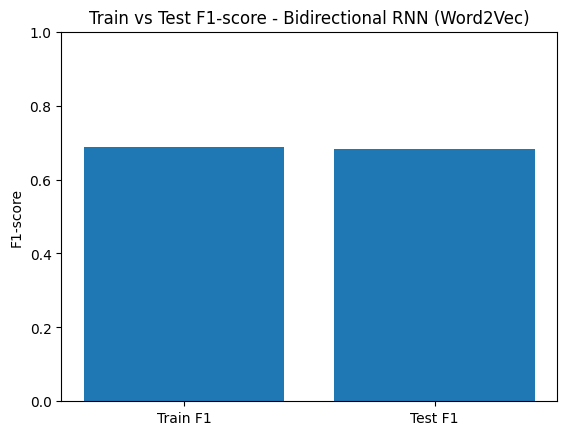

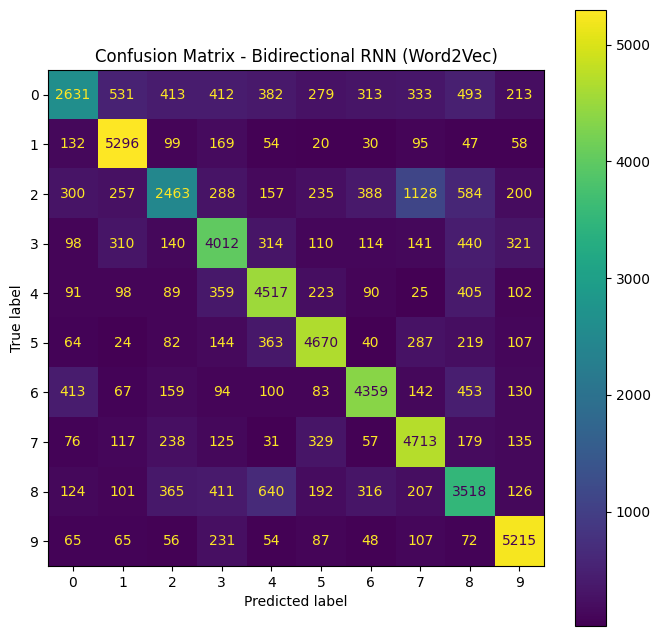

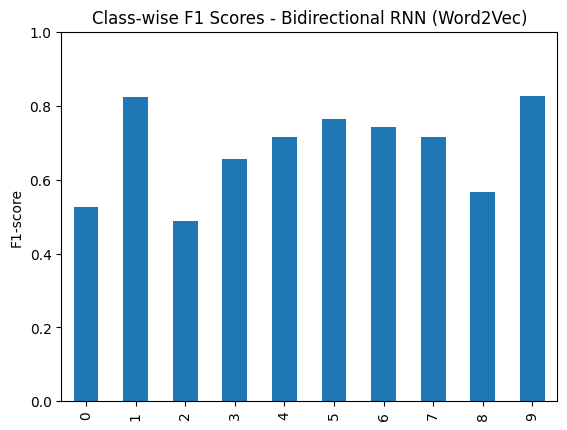

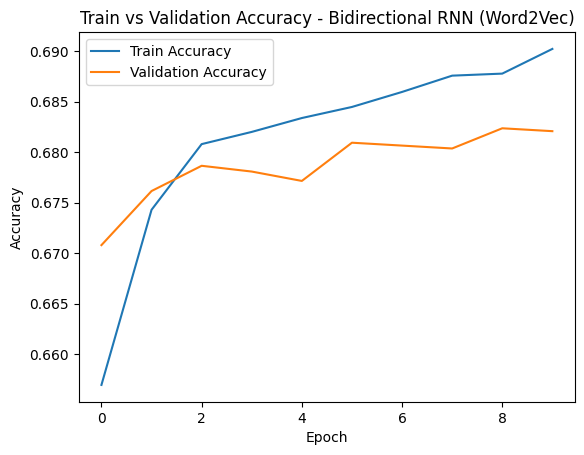

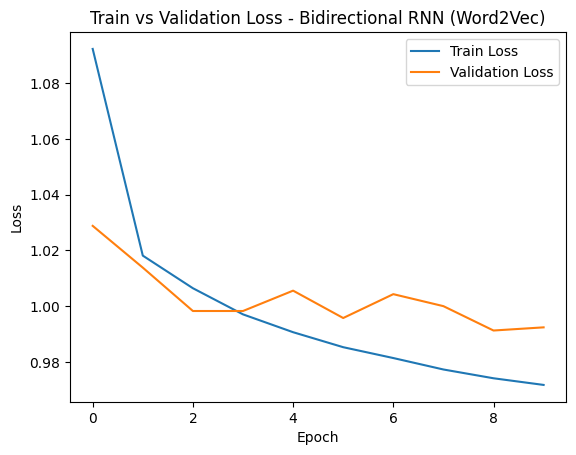

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="Bidirectional RNN (Word2Vec)"
)


#Simple GRU Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# reshape Word2Vec embeddings
X_train_rnn = X_train_w2v.reshape(X_train_w2v.shape[0], 1, X_train_w2v.shape[1])
X_val_rnn   = X_val_w2v.reshape(X_val_w2v.shape[0], 1, X_val_w2v.shape[1])
X_test_rnn  = X_test_w2v.reshape(X_test_w2v.shape[0], 1, X_test_w2v.shape[1])

# Load labels
y_train_split = np.load('/content/drive/MyDrive/nlp_project/y_train.npy')
y_val_split   = np.load('/content/drive/MyDrive/nlp_project/y_val.npy')

#  GRU
model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    GRU(128),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6001 - loss: 1.2796 - val_accuracy: 0.6719 - val_loss: 1.0370
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6760 - loss: 1.0282 - val_accuracy: 0.6762 - val_loss: 1.0068
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6794 - loss: 1.0067 - val_accuracy: 0.6733 - val_loss: 1.0165
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6809 - loss: 1.0039 - val_accuracy: 0.6749 - val_loss: 0.9997
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6864 - loss: 0.9787 - val_accuracy: 0.6756 - val_loss: 1.0023
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6850 - loss: 0.9810 - val_accuracy: 0.6751 - val_loss: 1.0024
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6855 - loss: 0.9738 - val_accuracy: 0.6806 - val_loss: 0.9855
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6891 - loss: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291,680 (1.11 MB)

 Trainable params: 97,226 (379.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 194,454 (759.59 KB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

================ Simle GRU (Word2Vec) =================
Train Macro F1-score: 0.6886
Test  Macro F1-score: 0.6815
Test Accuracy:        0.6897

Confusion Matrix:
[[2605  387  311  375  499  378  553  204  519  169]
 [ 199 5186   87  164   81   43   60   67   67   46]
 [ 363  215 2348  295  215  355  573  831  633  172]
 [  87  249  105 3971  441  176  162   97  462  250]
 [  71   84   52  254 4682  270  136   11  371   68]
 [  52   13   61   87  412 4967   70  105  178   55]
 [ 253   34  117   83  100   99 4837   58  337   82]
 [  99  125  305  150   51  570  115 4222  240  123]
 [ 103   63  289  371  728  268  473  118 3488   99]
 [  69   53   52  249   82  165   91   70   91 5078]]

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.43      0.53      6000
           1       0.81      0.86      0.84      6000
           2       0.63      0.3

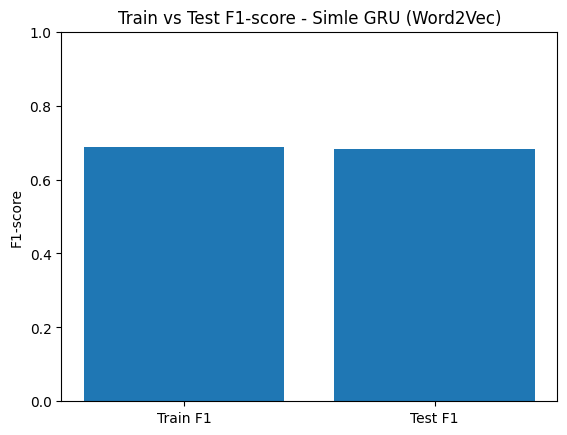

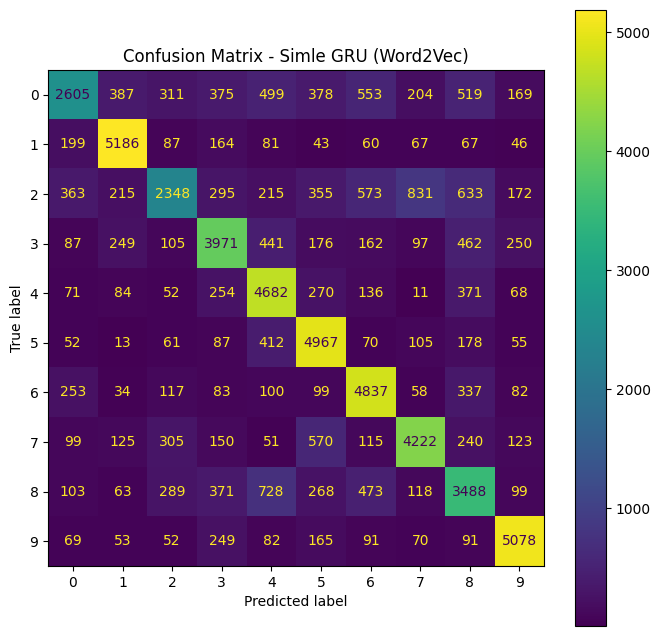

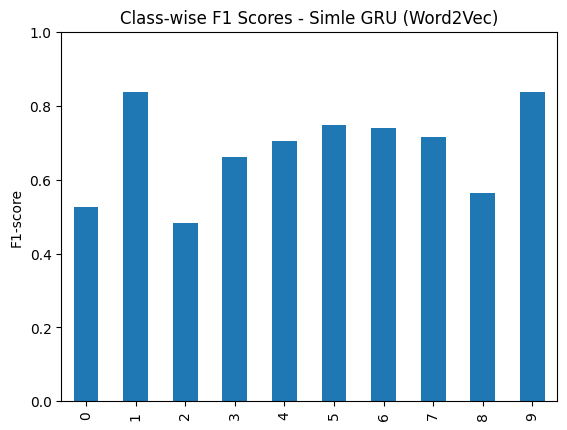

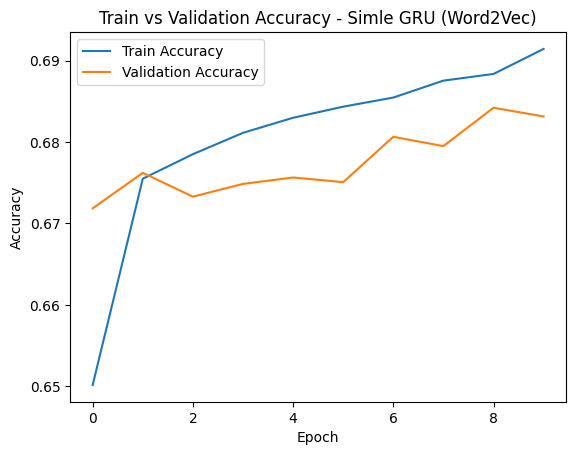

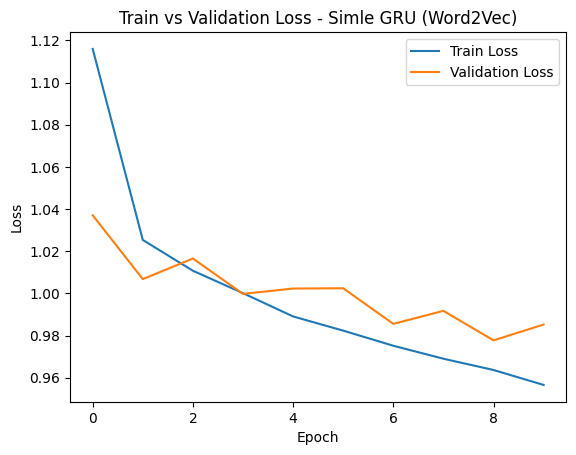

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="Simle GRU (Word2Vec)"
)


#Bidirectional GRU Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam

# Build Bidirectional GRU
model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    Bidirectional(GRU(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6201 - loss: 1.2276 - val_accuracy: 0.6699 - val_loss: 1.0281
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6761 - loss: 1.0247 - val_accuracy: 0.6737 - val_loss: 1.0139
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6806 - loss: 1.0018 - val_accuracy: 0.6770 - val_loss: 1.0045
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6813 - loss: 0.9941 - val_accuracy: 0.6794 - val_loss: 0.9942
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6872 - loss: 0.9740 - val_accuracy: 0.6786 - val_loss: 0.9970
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6878 - loss: 0.9717 - val_accuracy: 0.6831 - val_loss: 0.9828
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6904 - loss: 0.9574 - val_accuracy: 0.6776 - val_loss: 0.9982
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6883 - loss: 0

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,216 (2.22 MB)

 Trainable params: 193,738 (756.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 387,478 (1.48 MB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

================ Bidirectional GRU (Word2Vec) =================
Train Macro F1-score: 0.6956
Test  Macro F1-score: 0.6879
Test Accuracy:        0.6939

Confusion Matrix:
[[2925  316  382  375  523  245  459  267  356  152]
 [ 289 5087  110  163  109   22   56   77   29   58]
 [ 444  179 2583  272  242  200  509  964  461  146]
 [ 162  226  150 3969  467  117  186  114  333  276]
 [ 119   75   89  267 4807  174  124   18  255   71]
 [  99   15  102  113  529 4608   83  213  156   82]
 [ 343   30  141   75  124   56 4744  111  295   81]
 [ 144  103  322  120   53  353   77 4575  159   94]
 [ 179   63  394  394  863  189  461  179 3181   97]
 [ 102   40   67  202   88  104   89   98   57 5153]]

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.49      0.54      6000
           1       0.83      0.85      0.84      6000
           2       0.60 

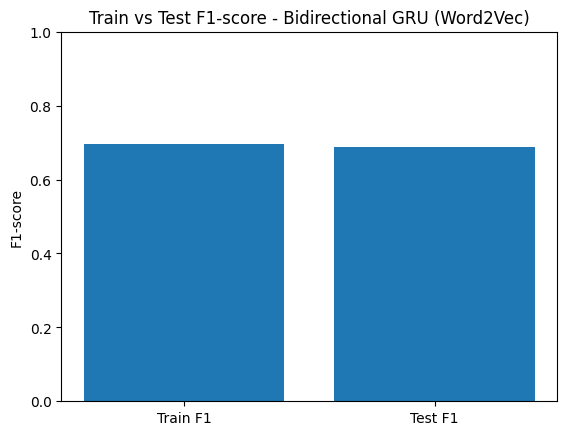

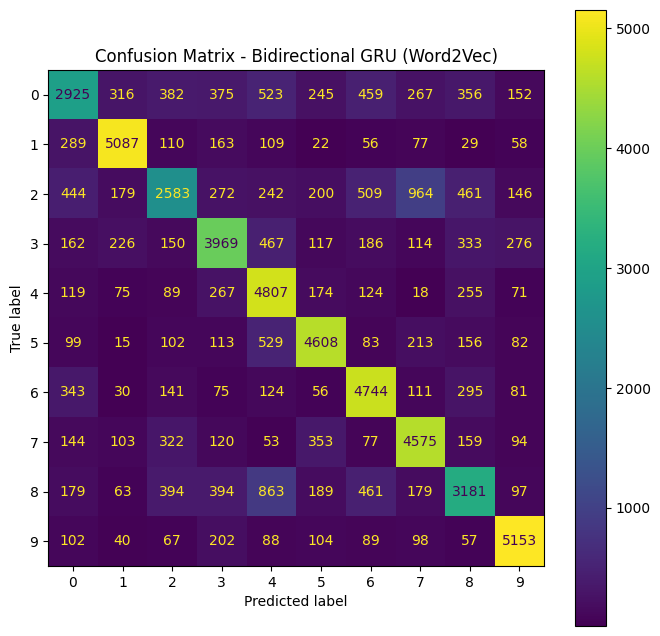

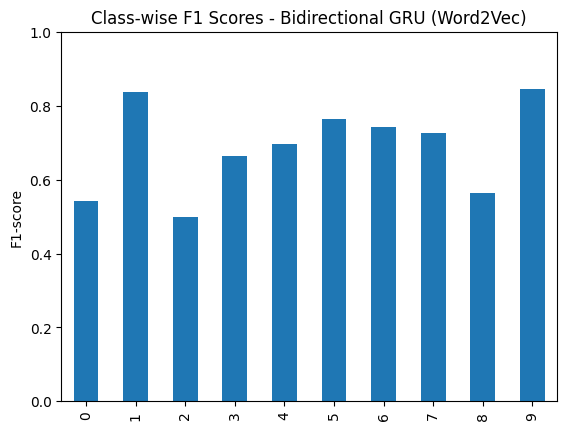

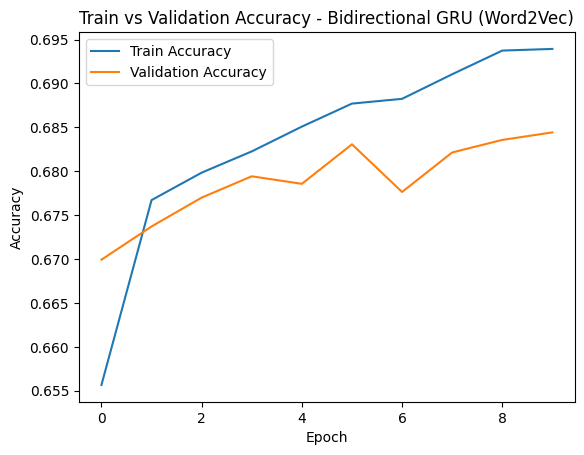

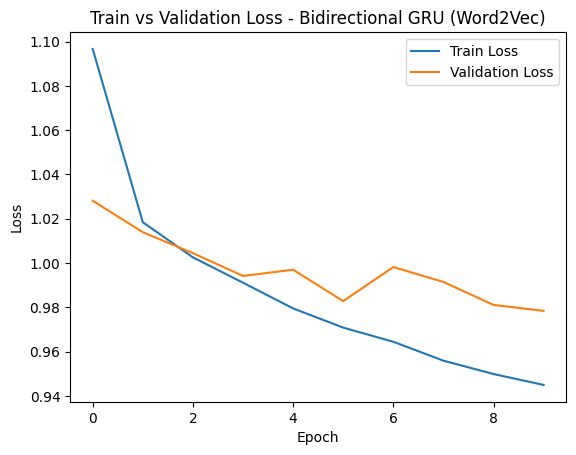

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="Bidirectional GRU (Word2Vec)"
)


#Simple LSTM Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# reshape Word2Vec embeddings
X_train_rnn = X_train_w2v.reshape(X_train_w2v.shape[0], 1, X_train_w2v.shape[1])
X_val_rnn   = X_val_w2v.reshape(X_val_w2v.shape[0], 1, X_val_w2v.shape[1])
X_test_rnn  = X_test_w2v.reshape(X_test_w2v.shape[0], 1, X_test_w2v.shape[1])

# Load labels
y_train_split = np.load('/content/drive/MyDrive/nlp_project/y_train.npy')
y_val_split   = np.load('/content/drive/MyDrive/nlp_project/y_val.npy')

# LSTM
model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    LSTM(128),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5866 - loss: 1.2971 - val_accuracy: 0.6675 - val_loss: 1.0313
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6749 - loss: 1.0293 - val_accuracy: 0.6726 - val_loss: 1.0240
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6776 - loss: 1.0122 - val_accuracy: 0.6734 - val_loss: 1.0082
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6807 - loss: 0.9936 - val_accuracy: 0.6794 - val_loss: 0.9922
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6836 - loss: 0.9849 - val_accuracy: 0.6800 - val_loss: 0.9875
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6882 - loss: 0.9741 - val_accuracy: 0.6789 - val_loss: 0.9887
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6873 - loss: 0.9747 - val_accuracy: 0.6799 - val_loss: 0.9845
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6881 - loss: 0

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,464 (1.44 MB)

 Trainable params: 126,154 (492.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,310 (985.59 KB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

================ LSTM (Word2Vec) =================
Train Macro F1-score: 0.6914
Test  Macro F1-score: 0.6863
Test Accuracy:        0.6918

Confusion Matrix:
[[2429  434  752  358  452  308  494  286  359  128]
 [ 140 5215  184  152   72   26   50   85   37   39]
 [ 203  179 3187  220  173  222  448  937  332   99]
 [  85  279  355 3891  406  145  180  134  324  201]
 [  71   95  157  261 4685  232  132   20  282   64]
 [  43   17  155  100  408 4784   65  219  150   59]
 [ 247   37  330   74   93   87 4727  109  246   50]
 [  58  106  536   93   44  362   79 4555  103   64]
 [  93   65  718  359  731  231  471  208 3051   73]
 [  65   68  141  267   74  129   99  122   54 4981]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      6000
           1       0.80      0.87      0.83      6000
           2       0.49      0.53    

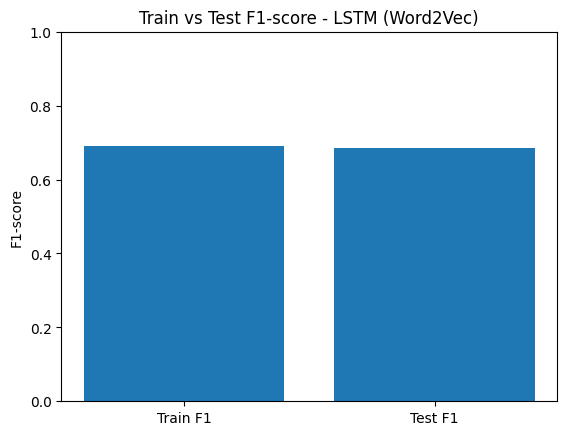

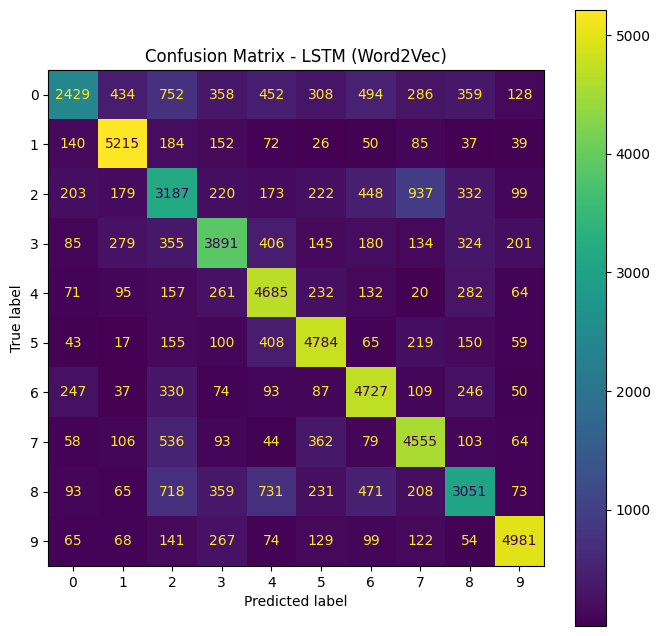

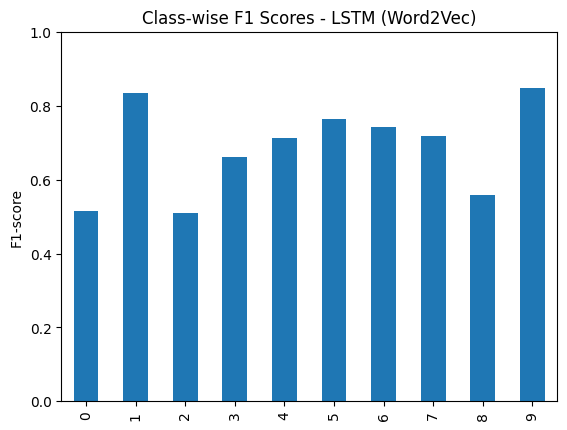

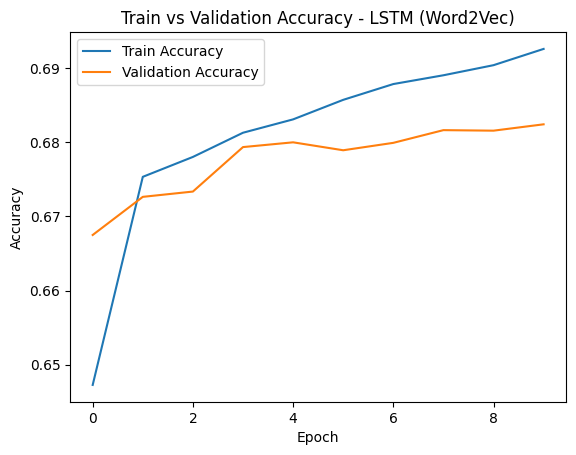

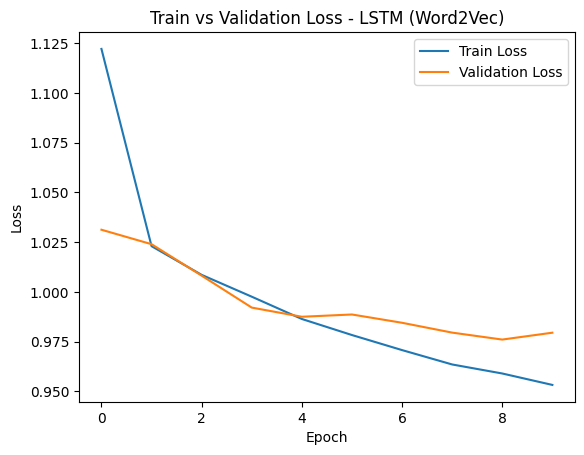

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="LSTM (Word2Vec)"
)


#Bidirectional LSTM Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam

# Build Bidirectional LSTM
model = Sequential([
    Input(shape=(1, X_train_w2v.shape[1])),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_split)), activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_rnn,
    y_train_split,
    validation_data=(X_val_rnn, y_val_split),
    epochs=10,
    batch_size=32
)

# Test
loss, acc = model.evaluate(X_test_rnn, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6036 - loss: 1.2655 - val_accuracy: 0.6720 - val_loss: 1.0237
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6734 - loss: 1.0182 - val_accuracy: 0.6737 - val_loss: 1.0127
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6802 - loss: 1.0028 - val_accuracy: 0.6770 - val_loss: 0.9987
Epoch 4/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6823 - loss: 0.9901 - val_accuracy: 0.6762 - val_loss: 0.9953
Epoch 5/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6885 - loss: 0.9640 - val_accuracy: 0.6800 - val_loss: 0.9891
Epoch 6/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6878 - loss: 0.9642 - val_accuracy: 0.6823 - val_loss: 0.9859
Epoch 7/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6937 - loss: 0.9493 - val_accuracy: 0.6812 - val_loss: 0.9788
Epoch 8/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6926 - loss: 0

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 754,784 (2.88 MB)

 Trainable params: 251,594 (982.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 503,190 (1.92 MB)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

================ Bidirectional LSTM (Word2Vec) =================
Train Macro F1-score: 0.6956
Test  Macro F1-score: 0.6861
Test Accuracy:        0.6927

Confusion Matrix:
[[2621  428  478  421  537  209  431  321  403  151]
 [ 181 5236  105  169   89   17   35   80   45   43]
 [ 273  225 2663  335  231  160  492 1017  473  131]
 [ 102  252  134 4102  465   88  162  131  334  230]
 [  74   90   78  282 4797  163  124   21  291   79]
 [  87   19  105  132  534 4429   75  346  188   85]
 [ 338   43  206   91  104   38 4703  113  287   77]
 [  73  117  356  136   52  255   82 4697  152   80]
 [ 119   75  383  432  861  148  457  209 3229   87]
 [  82   58   74  276   90   82   77  121   58 5082]]

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.44      0.53      6000
           1       0.80      0.87      0.83      6000
           2       0.58

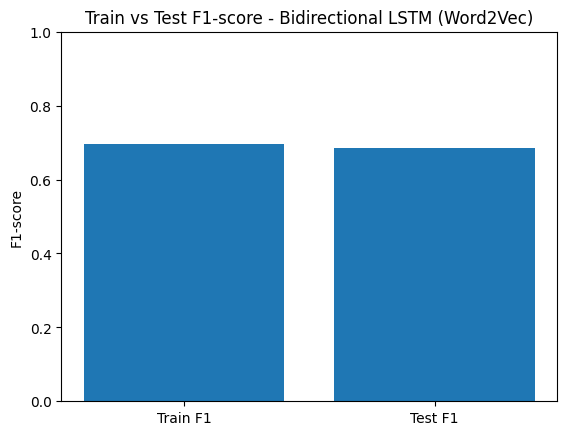

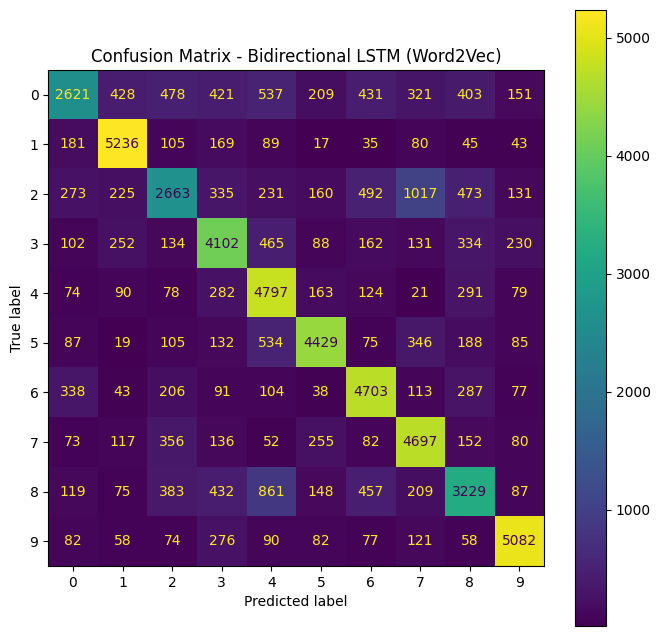

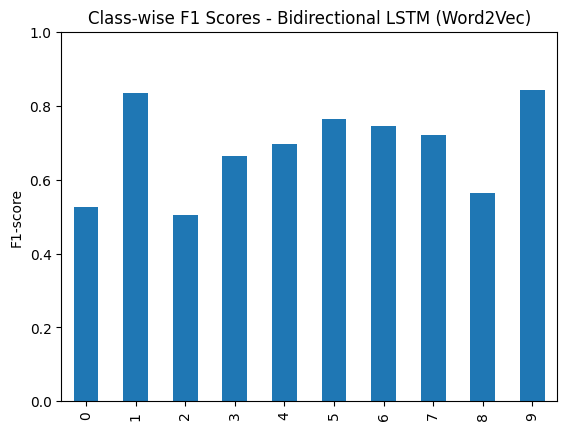

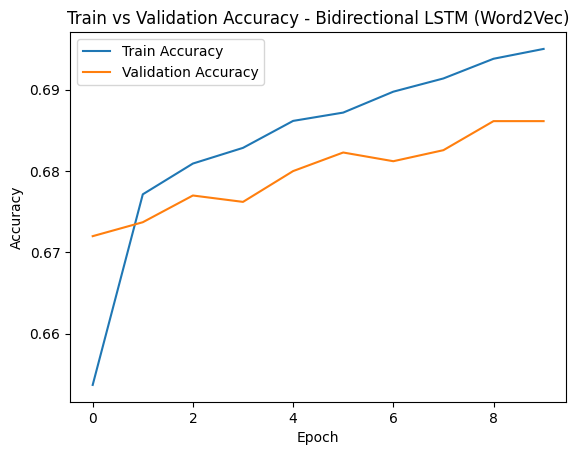

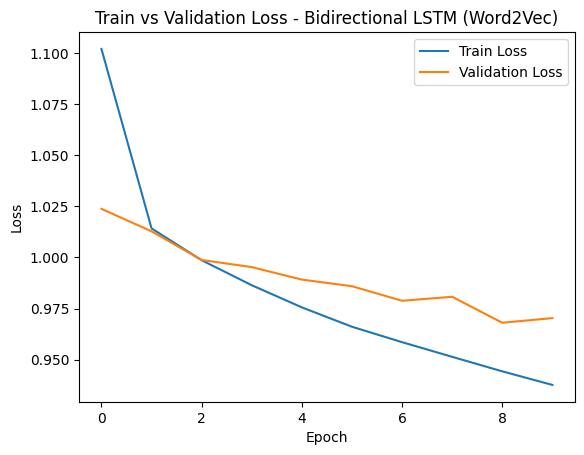

In [ ]:
f1_train, f1_test, cm, report = evaluate_model(
    model=model,
    X_train=X_train_rnn,
    y_train=y_train_split,
    X_test=X_test_rnn,
    y_test=y_test,
    model_name="Bidirectional LSTM (Word2Vec)"
)


In [ ]:
import pickle


with open('/content/drive/MyDrive/nlp_project/label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

# 2. View just the list of labels (The index is the encoded ID)
print("Classes found:", loaded_encoder.classes_)

# 3. Create a clean dictionary to see Label -> ID mapping
label_mapping = dict(zip(loaded_encoder.classes_, range(len(loaded_encoder.classes_))))

print("\nFull Mapping:")
for label, id in label_mapping.items():
    print(f"{label} : {id}")

Classes found: ['Business & Finance' 'Computers & Internet' 'Education & Reference'
 'Entertainment & Music' 'Family & Relationships' 'Health'
 'Politics & Government' 'Science & Mathematics' 'Society & Culture'
 'Sports']

Full Mapping:
Business & Finance : 0
Computers & Internet : 1
Education & Reference : 2
Entertainment & Music : 3
Family & Relationships : 4
Health : 5
Politics & Government : 6
Science & Mathematics : 7
Society & Culture : 8
Sports : 9
